Other things to tinker on. It's all for fun bro.

Rewriting engine. Give just a pile of rules?
Egraph engine
Custom ExprRef
Prolog / Minikanren
Knuth Bendix solver
superposition solver.
Compiler out of z3

Fun theories:
Temporal
Modal
Intuitionistic



We can bootstrap a lot of printers out of using sympy.
https://github.com/sympy/sympy/tree/master/sympy/printing

https://arxiv.org/pdf/1907.02836 isabelle review
conditional rewrite rules.

https://github.com/opencompl/xdsl-smt
--smt flag out of ebmc?


I could make class Group(Monoid): work...? Would that be good?


https://www.why3.org/stdlib/

again why3 _is_ kind of knuckedlragger


undef typeclass for funcdeclref
class Partial(TypeClass):
    key : FuncDeclRef
    value : FuncDeclRef # where undef? or the undef choiuce values

Very much like ACL2

or use the relational form of undef
substitute undef0 undef1 and ask the relational question

kd.define could check for refinement.
No. Something else?
kd.refine( x, y ) # a more complex judgement




# quotients
https://github.com/leanprover/lean4/blob/d0f4e7c59087f2db206c0554346cfe130ed68167/src/Init/Core.lean#L1577


In [ ]:
def Quotient(eqrel, pf, S):

    Q = DeclareSort(f"{S}/{eqrel}")
    Q.inj = smt.Function(f"inj", S, Q)
    Q.canon = smt.Function(f"canon", Q, S)
    Q.inj_canon = kd.axiom(smt.ForAll([x], Q.inj(Q.canon(x)) == x))
    Q.sound = kd.axiom(smt.ForAll([x, y], eqrel(x, y) == (Q.inj(x) == Q.inj(y)))

    # lift functions?
    Q.induct = kd.notation.induct.register(Q, lambda x, P: )


# a privileged equvialence relation for a sort. Newtypes tyo get new ones
eqrel = SortDispatch("eqrel")

class Setoid(TypeClass):
    def check(self, S, eqrel):
    

class Iso(TypeClass):

    @classmethod
    def cast(cls, a, S):
        Iso = cls(a.sort(),S)
        return Iso.f(a)

    def transport(self, pf : smt.ExprRef):
    

Interval = EReal # compact ereal. -inf = 0, inf = 1, 






# partial define

A style of partial definition.
We make it total by making a new truly undefined function.
Now unfolding and evaluation will work.

maybe here is wherer 

https://davecturner.github.io/2018/04/09/partial-functions-isabelle.html
https://www.joachim-breitner.de/blog/732-Isabelle_functions__Always_total,_sometimes_undefined

https://proofassistants.stackexchange.com/questions/602/how-to-represent-mathematical-partial-functions-in-a-type-theory-based-proof-ass

https://lawrencecpaulson.github.io/2021/12/01/Undefined.html

f.dom(x) <= f1.dom() and 


refines = f.dom(x), df.dom() and f(x) == f1(x)
def

we can detect undefinedness relationally via two idential definitions

f = kd.partial_define()
g = kd.partial_define()

Then the relational technique


tail calls are kind of special because now we are guaranteed to be able to totalize the thing somehow.
undefined behvaior


In [ ]:
def partial_define(name, args, *cases, by=None):
    if by is None:
        by = []
    undef = smt.Function(name + "_undef", *[arg.sort()])    
    f = kd.define(name, args, kd.cond(*cases, default=undef(*args)))
    f.undef = undef
    f.dom = kd.define(f"{name}_dom", *[arg.sort() for arg in args], 
                          smt.Or(*[case[0] for case in cases]))
    d.defined_thm = kd.prove(kd.QForAll(args, smt.Not(f.defined(*args)), f(*args) == undef(*args)), by=[f.defined.defn, undef.defn])
    if res_sort in kd.notation.wf:
        smt.QForAll(args, f.defined(*args), f(*args).wf(), by=[f.defined.defn, f.defn] + by)


def define(name, args, body, by=[]):
    f = kd.define(name, args, body)

    # sanity_check_termination(f)
    # + if in ipython show a table of example input output pairs
    if f.range() in kd.notation.wf:
        f.wf_range = smt.prove(kd.QForAll(args, f(*args).wf(), by=by + [f.defn]))

def refines(f, g):
    return smt.ForAll([args], f.dom(args), smt.And(g.dom(args), f(*args) == g(*args)))

# registration dataclass
Just tagging the write stuff onto the sort seems fine. Should't I be knuckledragging?
I could just have dictionaries that you can put the sort into.
You can then lookup in those dicionaries if you need it
And they check when you add them that they have the right stuff.

I feel like I end up doing that anyway


Or just have Inductive

kd.DeclareSort() that registers (and doesn't allow dups)


In [ ]:
class SortClass(): # Maybe even just subclass dicitonary or set
    def __init__(self, post_init):
        self.post_init = post_init
        self.registry = {}
    def __call__(self, *args):
        if args in self.registry:
            return self.registry[args]
    def __contains__(self, item):
        return item in self.registry




class CheckedDict(set):
    def __init__(self, check):
        self.check = check
    def __setiten

# assoc

f(MS(a,b,c)) -> f(a,(f(b,c)))



In [ ]:
def right_assoc(e : smt.ExprRef, trace=None):
    if smt.is_app(e):
        f = e.decl()
        if f in assoc:
            f.arg(0)
        if f.arity() == 2:
            x, y = e.children()
            return f(x, right_assoc(y, trace))
        
def ac_simp(e : smt.ExprRef, trace=None):
    if smt.is_app(e):
        f = e.decl()
        args = [ac_simp(a, trace) for a in e.children()]
        if f in assoc:
            
        else:
            return e
    else:
        return e
    



In [ ]:

import kdrag.property as prop

def assoc_norm(e, trace=None):
    if smt.is_app(e):
        f = e.decl()
        if f in assoc:
            c = assoc_norm(e.arg(1)) # normalize list tail
            # (a  * b) * c -> a * (b * c)
            todo = [e.arg(0)]
            while todo:
                x = todo.pop()
                if smt.is_app(x) and x.decl() == f:
                    a,b = x.children()
                    if trace is not None:
                        trace.append(assoc[f](a,b,c))
                    todo.append(x.arg(1))
                    todo.append(x.arg(0))
                else: # x is not f so it can actually be consed onto c.
                    c = f(x,c)
            return c
        else:
            return f(*[assoc_norm(arg) for arg in e.children()])

In [ ]:
def insert(f : smt.FuncDeclRef, x : smt.ExprRef, c : smt.ExprRef, trace=None) -> smt.ExprRef:
    """
    insert x into sorted list c
    "Cons" is fundecl f
    """
    if smt.is_app(c) and c.decl() == f:
        a,b = c.children()
        if x > a:
            if trace is not None:
                trace.append(assoc_comm(f)(x,a,b))
            return f(a, insert(f, x, b, trace=trace))
        else:
            return f(x, c)
    else:
        return f(x,c)


In [ ]:
def ac_norm(e):
    

# z3 to cvxpy
Use z3 quant eliin tactics?
Prove equivalence or equisat.

Take problem and provably mush it into quantifier free cvxpy form.



# z3 Gilmore

Just do dumbass saturation


# executable print
In the Pollack inconsistency, there was the idea that the printer and the parser should be inverses. It helps prevent some problems.

We can lookup whewre funcdecls are avaiabvle in the context.
And we can lookup exprs

and then we can assert that `exec(pprint(e), env).eq(e)` before we return the string pprint(e).
Kind of nice.




# alpha norm

Postorder or preorder traversal labelling have the bad property the bad property that you need to rename when something becomes a subterm.
You can instead make the name the maxuimum name used in the children
Or just name _everythign_ x.

If we do this, vs, body = open_binder_unhygienic, ForAll(vs, body) will change the term.

This is solving hashing modulo alpha in a brute forcish way. The thing is that ForAll(vs, body) is doing a full term sweep (although z3 probably has some nice optimizations is_ground etc.)
So it isn't even like this is better than preorder in the sense that you're still sweeping a lot.

hashlog... Hmm


The thing I thought was hard was _binderless_ alpha hashing.



In [ ]:

from kdrag.all import *

def alpha_norm(e, trace=None):
    if isinstance(e, smt.QuantifierRef):
        body = alpha_norm(e.body())
        vs = [smt.Const("x" + str(i), e.var_sort(i)) for i in range(e.num_vars())]
        if e.is_forall():
            return smt.ForAll(vs, body)
        elif e.is_exists():
            return smt.Exists(vs, body)
        elif e.is_lambda():
            return smt.Lambda(vs, body)
        else:
            raise ValueError("Unknown quantifier")
    elif smt.is_var(e):
        return e
    elif smt.is_app(e):
        f = e.decl()
        args = [alpha_norm(a, trace) for a in e.children()]
        return f(*args)




In [16]:
# These smart constructors will return alpha normal forms if always used. Literally Impossible read though.
from kdrag.all import *
def ForAllNorm(vs, body):
    vs1 = [smt.Const("x" + str(i), v.sort()) for i,v in enumerate(vs)]
    return smt.ForAll(vs1, smt.substitute(body, *zip(vs, vs1)))
def ExistsNorm(vs, body):
    vs1 = [smt.Const("x" + str(i), v.sort()) for i,v in enumerate(vs)]
    return smt.Exists(vs1, smt.substitute(body, *zip(vs, vs1)))
def LambdaNorm(vs, body):
    vs1 = [smt.Const("x" + str(i), v.sort()) for i,v in enumerate(vs)]
    return smt.Lambda(vs1, smt.substitute(body, *zip(vs, vs1)))

x,y,z = smt.Reals("x y z")
t1 = LambdaNorm([z], LambdaNorm([x,y], x == y))
t2 = LambdaNorm([z], LambdaNorm([x,y], z == y))
print(t1)
print(t2)
t1.eq(t2)

Lambda(x0, Lambda([x0, x1], x0 == x1))
Lambda(x0, Lambda([x0, x1], x0 == x1))


False

Could use get_id of normalized body. Convert body to de bruijn form, get_id, 
could get_quant depth

Wait I can accidentally capture another x. Huh.
"##VAR" might be better or something.


In [23]:
def quant_depth(e):
    if isinstance(e, smt.QuantifierRef):
        return 1 + quant_depth(e.body())
    elif smt.is_var(e):
        return 0
    elif smt.is_const(e):
        return 0
    elif smt.is_app(e):
        return max([quant_depth(a) for a in e.children()])
    else:
        raise ValueError("Unknown expression type")
def LambdaNorm(vs, body):
    d = quant_depth(body)
    vs1 = [smt.Const(f"x_{d}_{i}", v.sort()) for i,v in enumerate(vs)]
    return smt.Lambda(vs1, smt.substitute(body, *zip(vs, vs1)))
t1 = LambdaNorm([z], LambdaNorm([x,y], x == y))
t2 = LambdaNorm([z], LambdaNorm([x,y], z == y))
t3 = LambdaNorm([x], LambdaNorm([z,y], z == y))
print(t1)
print(t2)
print(t3)
t1.eq(t2)

Lambda(x_1_0, Lambda([x_0_0, x_0_1], x_0_0 == x_0_1))
Lambda(x_1_0, Lambda([x_0_0, x_0_1], x_1_0 == x_0_1))
Lambda(x_1_0, Lambda([x_0_0, x_0_1], x_0_0 == x_0_1))


False

# PlusCal



In [ ]:
labelcounter = 0

Stmt = tuple[str, smt.TBool]

# Hmm. Striclyy speaking could do something funky here.
def Ass(x : smt.DatatypeRef, e : ):
    def res(PC):
        label = genlabel()
        return label, label, Implies(PC[t] == label, Next(PC) == done_label, Next(x) == e)
    return res

def Seq(s1 :Stmt,s2 : Stmt):
    def res(PC):
        l1,l2, act1 = s1(PC)
        l3,l4 = act2 = s2(PC)
        return l1, l4, And(smt.Implies(PC[l2], Next[PC] == l3), act1,act2)
#def Seq(*stmts)

def While(cond, *body):
    def res(PC):
        label = genlabel()
        Seq(*body)

def If(cond, then, els):


def Proc(name, body : Stmt):
    PC = smt.FreshConst(prefix="PC_" + name)
    return PC, body(PC)










# intuition and vis
https://github.com/plantuml/plantuml?tab=readme-ov-file
https://github.com/ouhammmourachid/mermaid-py?tab=readme-ov-file
flow, sequence, class, state


If I statically stratified worlds...?
World0
World1
And when do I transition? Hmmm.




```mermaid
flowchart LR

A[Hard] -->|Text| B(Round)
B --> C{Decision}
C -->|One| D[Result 1]
C -->|Two| E[Result 2]
```

In [51]:
from kdrag.all import *
import kdrag.theories.logic.intuitionistic as I
a,b,c = smt.Consts("a b c", I.Prop)
s = smt.Solver()
s.add(smt.Not(I.Valid(I.Or(a, I.Not(a)))))
s.add(a.wf())
s.add([I.acc_refl.thm, I.acc_trans.thm])
a1 = smt.Function("a", I.World, smt.BoolSort())
w = smt.Const("w", I.World)
s.add(smt.ForAll([w], a1(w) == a.val(w)))
print(s.check())
m = s.model()
Worlds = m[I.World]
print("a" , [(w, m.eval(a.val(w))) for w in Worlds])
print("acc", {(w,u) : m.eval(I.acc(w,u)) for w in Worlds for u in Worlds})

sat
a [(World!val!1, True), (World!val!0, False)]
acc {(World!val!1, World!val!1): True, (World!val!1, World!val!0): False, (World!val!0, World!val!1): True, (World!val!0, World!val!0): True}


defaultdict(<class 'list'>, {Prop(Lambda(k!0, k!0 == World!val!1)): [a], World!val!1: [a], World!val!0: []})


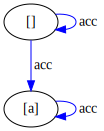

In [54]:
import graphviz
from collections import defaultdict
import itertools
def vis_model(m):
    dot = graphviz.Digraph()
    attrs = defaultdict(list)
    COLOR_PALETTE = ["blue", "red", "green", "purple", "orange", "brown", "pink"]
    color_cycle = itertools.cycle(COLOR_PALETTE)
    for f in m.decls():
        if f.arity() == 0:
            attrs[m[f()]].append(f)
        elif f.arity() == 1 and f.range() == smt.BoolSort():
            for v in m.get_universe(f.domain(0)):
                if m.eval(f(v)):
                    attrs[v].append(f)
        elif f.arity() == 1:
            color = next(color_cycle)
            for v in m.get_universe(f.domain(0)):
                dot.edge(str(v), str(m.eval(f(v))), label=str(f), color=color)
        elif f.arity() == 2 and f.range() == smt.BoolSort():
            color = next(color_cycle)
            for v in m.get_universe(f.domain(0)):
                for u in m.get_universe(f.domain(1)):
                    if m.eval(f(v,u)):
                        dot.edge(str(v), str(u), label=str(f), color=color)
    sorts = [m.get_sort(i) for i in range(m.num_sorts())]
    for s in sorts:
        for v in m.get_universe(s):
            dot.node(str(v), str(attrs[v]))
    print(attrs)
    return dot


vis_model(m)

#vis = SortDispatch("vis")
#vis.add(I.Prop, lambda x, m, dot: dot.node(str(x), label=str(x)))



#s.add(smt.Not(I.Valid(I.Implies(I.Not(I.Not(a)), a))))

In [36]:
kd.prove(kd.QForAll([a], I.Valid(I.Or(a, I.Not(a)))), by=[I.acc_refl, I.acc_trans])

LemmaError: (Implies(ForAll([w, u],
               Implies(And(acc(w, u), val(a)[w]), val(a)[u])),
        ForAll(w,
               val(Prop(Lambda(w,
                               Or(val(a)[w],
                                  val(Prop(Lambda(w,
                                        ForAll(u,
                                        Implies(acc(w, u),
                                        Implies(val(a)[u],
                                        val(Prop(K(World,
                                        False)))[u]))))))[w]))))[w])), 'Countermodel', [a = Prop(Lambda(k!0, Not(k!0 == World!val!0))),
 acc = [else ->
        Not(And(Not(Var(0) == World!val!0),
                Var(1) == World!val!0))]])

In [28]:
kd.prove(kd.QForAll([a], I.Valid(I.Implies(I.Not(I.Not(a)), a))), by=[I.acc_refl, I.acc_trans])

LemmaError: ('prove', Implies(ForAll([w, u],
               Implies(And(acc(w, u), val(a)[w]), val(a)[u])),
        ForAll(w,
               val(Prop(Lambda(w,
                               ForAll(u,
                                      Implies(acc(w, u),
                                        Implies(val(Prop(Lambda(w,
                                        ForAll(u,
                                        Implies(acc(w, u),
                                        Implies(val(Prop(Lambda(w,
                                        ForAll(u, ...))))[u],
                                        val(Prop(K(World,
                                        False)))[u]))))))[u],
                                        val(a)[u]))))))[w])), unknown)

# smart induct

https://arxiv.org/abs/2001.10834 smart induction for isabelle

What does isabelle induct tactic do.

What lightweight induction should prove have?

Something simple that can break pretty easy.


https://arxiv.org/pdf/2012.08990 novie friendly induction tactic

# recursors

An attempt at using polymoprhism. Doesn't work. Should I try to fix z3's polymorphism?


In [ ]:
from kdrag.all import *
import kdrag.theories.list as list_
a = smt.DeclareTypeVar("a")
IntList = list_.List(smt.IntSort())

rec = smt.Function("rec", IntList, a, smt.ArraySort(smt.IntSort(), a, a), a)
f = smt.Const("f", )
z = smt.Const("z", a)
rec = kd.define("rec", [l,z,f], smt.If(
    l.is_Nil, 
    z, 
    f(l.car, rec(l.cdr, z, f))))


In [7]:
from kdrag.all import *
import kdrag.theories.nat as nat
a = smt.DeclareTypeVar("a")
x = smt.Const("x", nat.Nat)
z = smt.Const("z", a)
f = smt.Const("f", smt.ArraySort(a, a))
rec = smt.Function("rec", nat.Nat, a, smt.ArraySort(a, a), a)
rec = kd.define("rec", [x, z, f], smt.If(
    x.is_Z,
    z,
    f(rec(x.pred, z, f)))
)
l = kd.Lemma(rec(x, nat.Nat.Z, smt.Lambda([x],x)) == nat.Nat.Z)

Z3Exception: Sort mismatch

In [10]:
from z3 import *
Nat = Datatype("Nat")
Nat.declare("Z")
Nat.declare("S", ("pred", Nat))
Nat = Nat.create()

a = DeclareTypeVar("a")

x = Const("x", Nat)
base = Const("base", a)
f = Const("f", ArraySort(a, a))
rec = Function("rec", Nat, a, ArraySort(a, a), a)

rec(x, base, f) == If(x == Nat.Z, base, f[rec(Nat.pred(x), base, f)]) # This is fine

p = Array("p", Nat, Nat)
rec(Nat.Z, Nat.Z, p) # This is a SortMismatch type error

Z3Exception: Sort mismatch

In [9]:
rec(x, z, smt.Lambda([z],z))

rec(x, z, Lambda(z, z))

In [11]:
rec(x, z, smt.Lambda([x],x))

Z3Exception: Sort mismatch

In [15]:
p = smt.Const("p", smt.ArraySort(a, a))
#p == smt.Lambda([x],x)

p == p

# conditional rules

Carette had that opinion about just taking the eager branch and collect up the conditions. backtrack if it doesn't work.

Inference of needed constraints. Reminds me of Wu's method.

I've seen it said that you match the left hand side, then recursively use simp on the cond.

We might want to mark some rules as "go ahead and take eagerly" and "no only take if you can immiedtaely discharge the condition"
Maybe some kind of eagerness parameter?

https://link.springer.com/chapter/10.1007/978-1-4757-3661-8_7  Advanced Topics in Term Rewriting . Conditional Rewrite Systems


In [ ]:

# eager and lazy are bad names. Since depending on viewpoint one or other is eager vs lazy
class EagerCondRule(Rule):
    cond # only take if can be IMMEDIATELY DISCKARGHED
class LazyCondRule(Rule):
    cond # take rule and accumulate the contexfual constraints. More like CLP. a constraint store.

def cond_simp(t, rules, cond_ctx=None):
    if cond_ctx is None:
        cond_ctx = []
    
def cond_rewrite(t, rule, condctx=None):
    if rule.cond is not None and condctx is None:
        raise ValueError("condctx must be provided if rule has a condition")
    subst = pmatch(t,rule.lhs, rule.vs)
    if subst is None:
        return None
    else:
        if rule.cond is not None:
            #smt.prove(condctx => rule.cond) # only take if can be immediately proven.
            # smt.prove(condctx => simp(rule.cond))
            condctx = condctx + z3.substitute(rule.cond, subst)
            if not rule.cond(condctx):
                return None
        return subst, rule.rhs

    


# Theory explore / rule synthesis

# halve theorem


In [3]:
from kdrag.all import *
import kdrag.theories.nat as nat

n,m = smt.Consts('n m', nat.Nat)
half = smt.Function('half', nat.Nat, nat.Nat)
half = kd.define('half', [n], kd.cond(
                     (n.is_Z, nat.Z),
                     (n == nat.S(nat.Z), nat.Z),
                     default=nat.S(half(n.pred.pred))
                     ))
half.defn

|- ForAll(n,
       half(n) ==
       If(is(Z, n),
          Z,
          If(n == S(Z), Z, S(half(pred(pred(n)))))))

# gappa rules


https://gappa.gitlabpages.inria.fr/gappa/theorems.html

In [ ]:
import kdrag.theories.real as real
x,y,z,a,b,u,l,eps = smt.Reals("x y z a b u l eps")
bnd = kd.define('bnd', [x, a, b], smt.And(a <= x, x <= b))
abs = kd.define('abs', [x, a, b], smt.If(x >= 0, smt.And(a <= x, x <= b), smt.And(a <= -x, -x <= b)))
rel = kd.define("rel", [x,y,a,b], kd.QExists([eps], a <= eps, eps <= b, x == y * (1 + eps)))
lin = kd.define("lin", [x,y,a,b], kd.QExists([eps], a <= eps, eps <= b, x == y * eps))
#fix = 
#flt
nzr = kd.define("nzr", [x], x != 0)


sub_of_eql = kd.prove(kd.QForAll([a,b], bnd(a - b, 0, 0), a == b), by=[bnd.defn])
eql_of_cst = kd.prove(kd.QForAll([a,b], bnd(a, 0, 0), bnd(b,0,0), a == b), by=[bnd.defn])


# flint
https://python-flint.readthedocs.io/en/latest/install.html

fungrim
It's python importable?
but also derelict?


flint has claculus... https://python-flint.readthedocs.io/en/latest/acb.html#flint.acb.integral
https://fredrikj.net/blog/2017/11/new-rigorous-numerical-integration-in-arb/

https://arblib.org/arb_calc.html
https://arblib.org/acb_calc.html
Mostly not exposed in python flint?

An overlapping chain


The distinction between ball airth and interval airth is actually kind of interesting.
I can't get precise ball radii, because they are rather chunky. That is why union wildly overppaorimxates.
union of intervals is precise.
What would interval analysis look like if it had been written as ball analysis? Does anything change?
https://stackoverflow.com/questions/53123151/ball-arithmetic-vs-interval-arithmetic
https://www.texmacs.org/joris/ball/ball.html

https://github.com/flintlib/python-flint/issues/126 using calcium

https://github.com/flintlib/flint/blob/main/src/python/flint_ctypes.py


In [56]:
from z3 import *

x1 = smt.RatVal(7070651414971679, 2251799813685248)
x2 = smt.RatVal(157, 50)
simplify(x1 <= x2)

False

In [69]:
import kdrag.theories.real.arb as kdarb
kd.prove(real.sin(3.14) <= 0.02, by=[kdarb.sin_bnd(arb(3.14, 0.01))])

|- sin(157/50) <= 1/50

In [70]:
kdarb.cos_bnd(arb(3.14, 0.01))

TypeError: cannot unpack non-iterable flint.types.arb.arb object

In [67]:
 1836111987367443/1152921504606846976 + 171795627/17179869184

0.011592394887336894

In [58]:
7070651414971679* 50 - 157 * 2251799813685248

14

In [ ]:
#Internalizing a theory of arb
Arb = DelcareSort("arb")
# Record()
smt.Function("of_data", Arb, Arb)
smt.Function("InArb", Arb, smt.RealSort(), BoolSort())

smt.Function("arb", RealSort(), Arb) # produces some arb that contains the real. also current prceisaion?
smt.Fucntion("mid")
smt.Function("rad")
kd.axiom(contains(arb(x), x))
kd.axion(contains(a, c) => cont(union(a,b), x ))
kd.axiom(contains(b, x) => cont(union(a,b), x ))

set_of_arb = kd.define("set_of_arb", [a], Lambda([x], InArb(a, x)))

kd.axiom(InterSection(set_of_arb(a), set_of_arb(b)) => set_of_arb(inter(a,b)))

# a tight form of the axiom.
kd.axiom(a.to_set() & b.to_set() <= (a & b).to_set())



In [21]:
import flint
flint.arb_series.cos(flint.arb(1))

TypeError: descriptor 'cos' for 'flint.types.arb_series.arb_series' objects doesn't apply to a 'flint.types.arb.arb' object

In [17]:
from flint.flint_ctypes import *
Exp = fexpr("Exp")
Pi = fexpr("Pi")
I = fexpr("NumberI")
E = lambda n: Exp(2*Pi*I/n)
qqbar(E(8) - E(8)**3).fexpr().latex()

ModuleNotFoundError: No module named 'flint.flint_ctypes'

In [33]:
import flint

def bisect_root(f,a,b, n=32):
    print(a,b)
    zero = flint.arb(0)
    ab = a.union(b)
    print(ab)
    if f(ab).contains(zero):
        if n <= 0:
            yield ab
        else:
            mid = (a+b)/2
            if mid < b and mid > a:
                yield from bisect_root(f,a,mid,n=n-1)
                yield from bisect_root(f,mid,b,n=n-1)
            else:
                yield ab

list(bisect_root(lambda x: x**2 - 1, arb(-1), arb(1)))


-1.00000000000000 1.00000000000000
[+/- 1.01]
-1.00000000000000 0
[+/- 1.01]
-1.00000000000000 -0.500000000000000
[+/- 1.01]
-1.00000000000000 -0.750000000000000
[+/- 1.01]
-1.00000000000000 -0.875000000000000
[+/- 1.01]
-1.00000000000000 -0.937500000000000
[-1e+0 +/- 0.0626]
-1.00000000000000 -0.968750000000000
[-1e+0 +/- 0.0313]
-1.00000000000000 -0.984375000000000
[-1e+0 +/- 0.0157]
-1.00000000000000 -0.992187500000000
[-1.0 +/- 7.82e-3]
-1.00000000000000 -0.996093750000000
[-1.0 +/- 3.91e-3]
-1.00000000000000 -0.998046875000000
[-1.0 +/- 1.96e-3]
-1.00000000000000 -0.999023437500000
[-1.00 +/- 9.77e-4]
-1.00000000000000 -0.999511718750000
[-1.00 +/- 4.89e-4]
-1.00000000000000 -0.999755859375000
[-1.00 +/- 2.45e-4]
-1.00000000000000 -0.999877929687500
[-1.00 +/- 1.23e-4]
-1.00000000000000 -0.999938964843750
[-1.000 +/- 6.11e-5]
-1.00000000000000 -0.999969482421875
[-1.000 +/- 3.06e-5]
-1.00000000000000 [-0.999984741210938 +/- 5.00e-16]
[-1.000 +/- 1.53e-5]
-1.00000000000000 [-0.9999

[[-1.00000000 +/- 4.66e-10], [1.00000000 +/- 4.66e-10]]

In [35]:
def partition(a,b,N):
    pass
def linspace(a,b,N):
    return [a + (b-a)*i/N for i in range(N+1)]

linspace(arb(0), arb(1), 10)

def chainify(xs):
    return [xs[i].union(xs[i+1]) for i in range(len(xs)-1)]
chainify(linspace(arb(0), arb(1), 1000))


[[+/- 1.01e-3],
 [+/- 2.01e-3],
 [+/- 3.01e-3],
 [+/- 4.01e-3],
 [+/- 5.01e-3],
 [+/- 6.01e-3],
 [+/- 7.01e-3],
 [+/- 8.01e-3],
 [+/- 9.01e-3],
 [+/- 0.0101],
 [0.01 +/- 1.01e-3],
 [0.01 +/- 2.01e-3],
 [0.01 +/- 3.01e-3],
 [0.01 +/- 4.01e-3],
 [0.01 +/- 5.01e-3],
 [0.02 +/- 5.01e-3],
 [0.02 +/- 4.01e-3],
 [0.02 +/- 3.01e-3],
 [0.02 +/- 2.01e-3],
 [0.02 +/- 1.01e-3],
 [0.02 +/- 1.01e-3],
 [0.02 +/- 2.01e-3],
 [0.02 +/- 3.01e-3],
 [0.02 +/- 4.01e-3],
 [0.02 +/- 5.01e-3],
 [0.03 +/- 5.01e-3],
 [0.03 +/- 4.01e-3],
 [0.03 +/- 3.01e-3],
 [0.03 +/- 2.01e-3],
 [0.03 +/- 1.01e-3],
 [0.03 +/- 1.01e-3],
 [0.03 +/- 2.01e-3],
 [0.03 +/- 3.01e-3],
 [0.03 +/- 4.01e-3],
 [0.03 +/- 5.01e-3],
 [0.04 +/- 5.01e-3],
 [0.04 +/- 4.01e-3],
 [0.04 +/- 3.01e-3],
 [0.04 +/- 2.01e-3],
 [0.04 +/- 1.01e-3],
 [0.04 +/- 1.01e-3],
 [0.04 +/- 2.01e-3],
 [0.04 +/- 3.01e-3],
 [0.04 +/- 4.01e-3],
 [0.04 +/- 5.01e-3],
 [0.05 +/- 5.01e-3],
 [0.05 +/- 4.01e-3],
 [0.05 +/- 3.01e-3],
 [0.05 +/- 2.01e-3],
 [0.05 +/- 1.01e-3],
 

Ok, so even exactly given may round up

In [49]:
def intify(x):
    midab = x.mid().man_exp()
    radab = x.rad().man_exp()
    print(midab, radab)
    print(x.str(1000), arb(midab, radab))
    print(x.contains(arb(midab, radab)))
    print(x.rel_accuracy_bits(), arb(midab, radab).rel_accuracy_bits())
    print(x.contains_interior(arb(midab, radab)))
    assert arb(midab, radab).contains(x)
    return midab, radab 


intify(arb.pi())

(884279719003555, -48) (1, -52)
[3.141592653589793 +/- 3.39e-16] [3.14159265358979 +/- 3.34e-15]
False
52 52
False
True


((884279719003555, -48), (1, -52))

In [ ]:
def is_overlap_chain(chain):
    return all(chain[i].overlaps(chain[i+1]) for i in range(len(chain)-1))
def is_underlap(balls):
    return all(not balls[i].overlaps(balls[j]) for i in range(len(balls)) for j in range(i))



In [ ]:
import flint
flint.arb(1)
from flint import *
arb.pi()

(4*arb.atan(arb(1))).contains(arb.pi())
https://fungrim.org/topic/Pi/

True

In [15]:
from flint import *
type(arb.pi())

flint.types.arb.arb

In [1]:
from kdrag.all import *
import kdrag.theories.real.sympy as sym
import kdrag.theories.real as real
def flint_const_ax(lhs,rhs):
    if not sym.interp_flint(lhs, {}).overlaps(sym.interp_flint(rhs, {})):
        raise ValueError(f"lhs and rhs do not numerically overlap: {lhs} and {rhs}")
    return kd.axiom(smt.Eq(lhs, rhs), by="flint")
sym.interp_flint(real.pi, {})
sym.interp_flint(4*real.atan(1), {})

flint_const_ax(real.pi, 4*real.atan(1))
#flint_const_ax(real.pi, 2*real.acos(0))
#flint_const_ax(0, real.sin(0))
flint_const_ax(smt.RealVal(0), real.sin(0))
flint_const_ax(real.sin(3*real.pi/2), -1)


|- sin((3*pi)/2) == -1

In [9]:


from flint import *
arb(1).union(arb(3)) # hmm. Ok so not a very tight union.
arb(1).upper()
arb(1).lower()


1.00000000000000

In [15]:
arb(1, 0.5) <= arb(1.3, 0.5)

False

There are inference/synthesizing vs confirmation forms. 



In [ ]:
# def 
def flint_upper_ax(e): #arb_le_ax
    pass # infer upper bound
def flint_lower_ax(e): #arb_ge_ax
def arb_lt_ax(e1,e2):
    # This is more rigorous than using eq. The numerical calculation can never guarantee eq, except if rational.
    v1,v2 = interp_flint(e1, {}), interp_flint(e2, {})
    assert v1 < v2 # I think this does only return true if can be guaranteed.
    assert not v1.overlaps(v2)
    return kd.axiom(e1 < e2, by="flint")



Establishing functional relationships.




In [ ]:
def arb_le_ax(f1, f2, *vs):
    
    v1,v2 = interp_flint(e1, {}), interp_flint(e2, {})
    assert v1 <= v2
    assert not v1.overlaps(v2)
    return kd.axiom(e1 <= e2, by="flint")

In [ ]:
#import kdrag.hypothesis as hyp
import hypothesis as hyp

def arbgen(**kwargs):
    return hyp.tuple(hyp.floats(min_value=-1e6, max_value=1e6, **kwargs), hyp.floats(min_value=0, max_value=1e6)).map(lambda x: arb(x[0], x[1]))
# carb
# 


In [23]:
4*arb.atan(arb(1))

[3.14159265358979 +/- 3.34e-15]

In [ ]:
def sympy_ax(vs, lhs, rhs):
    assert lhs.sort() == smt.RealSort()
    assert rhs.sort() == smt.RealSort()
    assert (lhs - rhs).is_zero
    return kd.axiom(smt.ForAll(vs, smt.Eq(lhs, rhs)))

def flint_ax(lhs, rhs):
    assert 

In [ ]:
import pygrim


/home/philip/philzook58.github.io/.venv/lib/python3.12/site-packages/pygrim/algebraic.py:303: SyntaxWarning: invalid escape sequence '\s'
  """


# BDD

I could make bdds out of z3 expressions


# minikanren

A meta minikanren might be useful.
http://webyrd.net/scheme-2013/papers/HemannMuKanren2013.pdf


In [ ]:
from kdrag.all import *
from dataclasses import dataclass

@dataclass
class State():
    vs : list[smt.ExprRef]
    subst : dict[smt.ExprRef, smt.ExprRef]
    # constrs
    def copy(self):
        return State(self.vs.copy(), self.subst.copy())
    def is_var(self, v):
        return any(v.eq(v2) for v2 in self.vs)

    def walk(self, t):
        if self.is_var(t):
            if t in self.subst:
                return self.walk(self.subst[t])
            else:
                return t
        else:
            return t.decl()(*[self.walk(a) for a in t.children()])
    def unify(self, t1, t2):
        t1 = self.walk(t1)
        t2 = self.walk(t2)
        if t1.eq(t2):
            return self
        elif self.is_var(t1):
            self.occur_check(t1, t2)
            newstate = self.copy()
            newstate.subst[t1] = t2
            return newstate
        
        elif t1.decl() == t2.decl() and len(t1.children()) == len(t2.children()):
            newstate = self.copy()
            for a, b in zip(t1.children(), t2.children()):
                newstate = newstate.unify(a, b)
            return newstate








# regex
That regis paper has a nice set of theorems.


KAT
actually for regex, the software foundations thng
An example of coinductives?

sequence of (set state) -> bool = (state -> bool) -> bool

p = Lambda([s], s.p == True)
q = Lambda([s], s.q == True)
p & q = intersection.

The properties that are true on that world.

seq (action * (set state))

Most recetn action could be part of state (?)
state = {p, q , r, rec_action : ActionEnum}

Re (Re state)



In [14]:

from kdrag.all import *


State = kd.Struct("State", ("x", smt.BoolSort()))
state0 = State(False)
TRUE = smt.Re(smt.Unit(smt.BoolVal(True)))
smt.Re(smt.Unit(state0))
#FALSE = 


Re(Unit(State(False)))

# simp improvements
def simp(add=[], unfolds=[]):


Do I use the smaller term thing or not?

def simp_hard():


prove improvements
prove(blast=True) #unfold all defns
prove(unfold[]) # do some unfolds first
prove(induct=True, induct=[custom?]) # do dumb default induction
prove(rw=[]) # do some rewrites first

unfold_and_simplify


Rewrite rule database

Lean isabelle have them
Coq too I guess

GHC rules
Hlint rules
In egg or egglog test suites
rewriting competition
termination competition
maude
functional programs
cvc5 rewrite rules
In my egraph notes
https://pypy.org/posts/2024/07/finding-simple-rewrite-rules-jit-z3.html
calculus rules. rubi
twee rules
clean
group theory



# isabelle style kernel
Isabelle HOL is pretty readable to me now actually.
I could go file by file and try to translate it.



https://www.cl.cam.ac.uk/techreports/UCAM-CL-TR-130.html



https://bsky.app/profile/pqnelson.bsky.social/post/3lholxw4jb22q

invalid tactics
"It was known at the very start and explained in the LCF book itself. It was inherent to the design. Abolishing them was a key reason for Isabelle (which still has a proof kernel, but a wholly different concept of tactic)"

Do dummy forward proof every step? https://bsky.app/profile/freekwiedijk.bsky.social/post/3lhqetyqx6c2x



In [ ]:
class Proof(): # This _is_ Rule.
    vs: list[smt.ExprRef]
    hyps: list[smt.ExprRef]
    concs: list[smt.ExprRef]
    subproofs : list["Proof"]

def prove(vs, hyps, concs):
    return Proof(vs, hyps, concs):


# dynamic logic
see other note




# multi arg array check

In [49]:
import z3
a = z3.Array('a', z3.IntSort(), z3.BoolSort(), z3.IntSort())
a.domain_n(0)
a.domain_n(1)
dir(a)
#a.domain_n(2)

def domain_sorts(a : smt.ArrayRef | smt.ArraySortRef) -> list[smt.SortRef]:
    assert isinstance(a, smt.ArrayRef) or isinstance(a, smt.ArraySortRef)
    acc = []
    try:
        for i in range(10):
            acc.append(a.domain_n(i))
    except z3.Z3Exception:
        return acc
dom_sorts(a)



[Int, Bool]

# polars
meta.tree_form
https://docs.pola.rs/api/python/stable/reference/testing.html



# ivy 
https://kenmcmil.github.io/ivy/

# Alloy
https://alloytools.org/

https://lara.epfl.ch/w/_media/projects/guru/krml186.pdf

Hmm. Relational algebra., If i want to use z3 builkt in transitive closure, it only takes funcdecls?
Could use sec ond order axiom.

In [ ]:
from kdrag.all import *
File = DeclareSort("File")



https://haslab.github.io/formal-software-design/structural-design/index.html

Dir
Dir[Object!val!0]
Dir[Object!val!2]
Dir[Object!val!1]
Array(Object, Bool)
Object
File
File[Object!val!0]
File[Object!val!2]
File[Object!val!1]
Array(Object, Bool)
Object
Object


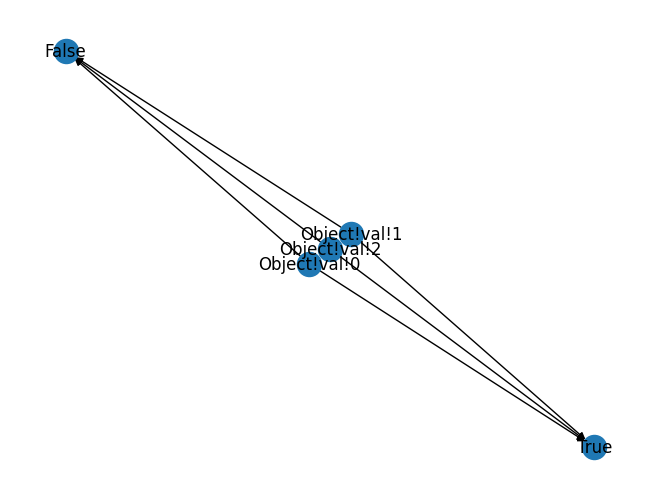

In [38]:
from kdrag.all import *
import kdrag.theories.set as set_
Object = smt.DeclareSort("Object")
SObject = set_.Set(Object)
Object1 = smt.FullSet(Object)
File = smt.Const("File", SObject)
Dir = smt.Const("Dir", SObject)

s = smt.Solver()
disjoint = File & Dir == smt.EmptySet(Object)
s.add(disjoint)
s.add(File | Dir == Object1)
a,b,c = smt.Consts("a b c", Object)
s.add(smt.Distinct(a,b,c))
s.check()
m = s.model()

#print(m[Object])
import networkx as nx
G = nx.DiGraph()

for x in m.sorts():
    for y in m[x]:
        G.add_node(y, type=x)

for f in m:
    #print(f, f.arity())
    if f.arity() == 1:
        #print(f)
        for x in m.get_universe(f.domain(0)):
            G.add_edge(x, m[f(x)])
    if isinstance(f.range(), smt.ArraySortRef):
        print(f)
        for x in m.get_universe(f().domain()):
            print(f()[x])
            G.add_edge(x, m.eval(f()[x]), label=f.name())
    #print(x)
    #print(m[x])
    print(f.range())

nx.draw(G, with_labels=True)


A different style. Associate a sort to each "set" with explicit casting functions.

Yeah, This is just very subtype coded.
Which I'm skeptical of.



In [12]:
Object = smt.DeclareSort("Object")
File = smt.DeclareSort("File")
to_object = smt.Function("to_object", File, Object)
#from_object = smt.Function("from_object", Object, File)
smt.ForAll([x], from_object(to_object(x)) == x)
def is_file(x):
    return smt.Exists([y], x == to_object(y))
# declare quasi inverse and or
smt.ForAll([x,y], x != y == to_object(x) != to_object(y)) # injective





NameError: name 'x' is not defined

In [ ]:
from kdrag.all import *
import kdrag.theories.set as set_
Univ = smt.DeclareSort("Univ")
SUbiv = set_.Set(Univ)
Object = smt.Const("Object", SUniv)
File = smt.Const("File", SObject)
Dir = smt.Const("Dir", SObject)

s = smt.Solver()
disjoint = File & Dir == smt.EmptySet(Object)
s.add(disjoint)
s.add(File | Dir == Object)
s.check()
s.model()

In [ ]:
def one(name):
    o = smt.Const(name, SUniv)
    skolem = smt.Const(name, Univ)
    ForAll([z], o[z] == (z == skolem))

def lone(name, superset):
    one(name) | o == EmptySet()

how to force caridnality

Exists([a,b,c], Distinct(a,b,c))


In [ ]:
class Sig():
    sort : 
    subsorts :
    constrs :
    def extends(self, name):
         

# Examples table

Use draw from hypothesis to get a couple examples?
Print as a nice table



In [2]:
from IPython.display import display, HTML

data = [
    ("x = 1", "f(x) = 2"),
    ("x = 2", "f(x) = 4"),
    ("x = 3", "f(x) = 6"),
]

html = "<table style='border-collapse: collapse; width: 50%;'>"
html += "<tr><th style='border: 1px solid black; padding: 5px;'>Input</th><th style='border: 1px solid black; padding: 5px;'>Output</th></tr>"
for row in data:
    html += "<tr>" + "".join(f"<td style='border: 1px solid black; padding: 5px;'>{cell}</td>" for cell in row) + "</tr>"
html += "</table>"

display(HTML(html))

Input,Output
x = 1,f(x) = 2
x = 2,f(x) = 4
x = 3,f(x) = 6


In [3]:
def is_user_executed():
    return __name__ == "__main__"

print(is_user_executed())  # True in Jupyter user cell, False in imported code


True


# iso
https://www.cs.tufts.edu/~nr/cs257/archive/phil-wadler/views.pdf 
views

univalence
Talia's proof repair claimed to be using meta univalence
https://arxiv.org/html/2310.06959v2 cubical
https://taliasplse.wordpress.com/2020/02/02/automating-transport-with-univalent-e-graphs/

snoc <-> cons list
peano nats <-> binary nats <-> NatI


John major equality

def JMEQ(x,y):
    



In [ ]:
@dataclass
class Iso():
    f : smt.FuncDeclRef
    g : smt.FuncDeclRef
    to_from : kd.Proof
    from_to : kd.Proof

# Fstar


# Pauli
https://rand.cs.uchicago.edu/vqc/toc.html

# solve_for
https://x.com/BjornerNikolaj/status/1885081313033736647

https://github.com/Z3Prover/z3/blob/e3566288a48e9e88346b9e8eac44472d1c34aff6/src/api/python/z3/z3.py#L7394

congruence_explain


ooh. py_value is new function


project_with_witness hmm what is this.

Yeah, looking through the API file history every once in a while is good



In [2]:
import z3

s = z3.SimpleSolver()
x,y,z = z3.Reals("x y z")
s.add(x == y + z)
#s.add(y == z)
#s.check()
s.solve_for([x,y,z])

Z3Exception: Python bool, int, long or float expected

# choose



In [ ]:
@functools.cache
def CHOOSE(S):
    x = smt.Const("x", S)
    pred = smt.Const("f", smt.ArraySort(S, smt,BoolSort()))
    choose = smt.Function("CHOOSE", smt.ArraySort(S, smt.BoolSort()), S)
    choose.defn = kd.axiom(ForAll([f], smt.Exists([x], pred[x]) == pred[choose(f)]))
    return choose

def default_choose(f : smt.ArrayRef):
    A = f.sort()
    S = A.domain()
    assert smt.BoolSort() == A.range()
    choose = CHOOSE(S)
    return choose(f)

choose = SortDispatch("choose", default)




# WP

https://www.philipzucker.com/weakest-precondition-z3py/


# Rerstrict


Wellformeded of arrays

kd.define( , [x,y,z], 
    # if any of x,y,z are resrict,
    If(not x.restrict() or y.restrict() or z.restrict() or res.restrict()),
    Some(),
    None()
)

Maybe kind of like program mode in Coq?

# python parse
https://www.philipzucker.com/applicative_python/

https://news.ycombinator.com/item?id=42918846 decorator jits

Might want to think about lookup ordering.
Does it go up the stack? local global

Could use ast munging to build a WP
assume()
assert()
inv()

Or compile to cbmc


In [18]:
import inspect

def get_calling_site():
    #ipython = get_ipython()
    #if ipython is not None:
    stack = inspect.stack()
    if len(stack) > 1:
        caller_frame = stack[1]
        frame = caller_frame.frame
        return frame.f_locals, frame.f_globals
    raise ValueError("No calling site found")

# Example usage
def example_call():
    # hey there!
    """hi there"""
    x = 4
    some_method()
foo = 42
l,g = get_calling_site()
#example_call()
print("foo" in l)
print("foo" in g)
l["foo"]
g["foo"]

True
True


42

In [ ]:
import ast
import inspect
import z3
import astpretty
from kdrag.all import *

def lookup(name, globals=None, locals=None):
    if locals is not None and name in locals:
        return locals[name]
    if globals is not None and name in globals:
        return globals[name]
    raise ValueEr
ror(f"could not find {name}")

def z3_expr(expr: ast.expr, globals=None, locals=None) -> z3.ExprRef:
    def rec(expr):
        match expr:
            case ast.Constant(value, kind=None): return smt._py2expr(value)
            case ast.UnaryOp(ast.UAdd(), operand): return +rec(operand)
            case ast.UnaryOp(ast.Not(), operand): return ~rec(operand)
            case ast.UnaryOp(ast.USub(), operand): return -rec(operand)
            case ast.UnaryOp(ast.Invert(), operand): return ~rec(operand)
            case ast.UnaryOp(_, operand): raise NotImplementedError(f"UnaryOp {expr.op}")
            case ast.BinOp(left=l, op=ast.Add(), right=r): return rec(l) + rec(r)
            case ast.BinOp(left=l, op=ast.Sub(), right=r): return rec(l) - rec(r)
            case ast.BinOp(left=l, op=ast.Mult(), right=r): return rec(l) * rec(r)
            case ast.BinOp(left=l, op=ast.Div(), right=r): return rec(l) / rec(r)
            case ast.BinOp(left=l, op=ast.Mod(), right=r): return rec(l) % rec(r)
            case ast.BinOp(left=l, op=ast.Pow(), right=r): return rec(l) ** rec(r)
            case ast.BinOp(left=l, op=ast.LShift(), right=r): return rec(l) << rec(r)
            case ast.BinOp(left=l, op=ast.RShift(), right=r): return rec(l) >> rec(r)
            case ast.BinOp(left=l, op=ast.BitOr(), right=r): return rec(l) | rec(r)
            case ast.BinOp(left=l, op=ast.BitXor(), right=r): return rec(l) ^ rec(r)
            case ast.BinOp(left=l, op=ast.BitAnd(), right=r): return rec(l) & rec(r)
            case ast.BinOp(left=l, op=ast.FloorDiv(), right=r): return rec(l) // rec(r)
            case ast.BoolOp(op=ast.And(), values=values): return smt.And(*map(rec, values))
            case ast.BoolOp(op=ast.Or(), values=values): return smt.Or(*map(rec, values))
            case ast.Compare(left, ops, rights):
                acc = []
                left = rec(left)
                for op, right in zip(ops, rights):
                    right = rec(right)
                    match op:
                        case ast.Eq(): acc.append(smt.Eq(left, right))
                        case ast.NotEq(): acc.append(left != right)
                        case ast.Lt(): acc.append(left < right)
                        case ast.LtE(): acc.append(left <= right)
                        case ast.Gt(): acc.append(left > right)
                        case ast.GtE(): acc.append(left >= right)
                        case _:
                            raise NotImplementedError(f"Compare {op}")
                    left = right
                if len(acc) > 1:
                    return z3.And(*acc)
                else:
                    return acc[0]
            case ast.Call(ast.Name(id_,ctx), args, keywords):
                assert keywords == []
                f = lookup(id_, globals=globals, locals=locals)
                return f(*map(rec, args))
            case ast.IfExp(test, body, orelse): return smt.If(rec(test), rec(body), rec(orelse))
            case ast.Name(id_, ctx): return lookup(id_, locals, globals)
            case ast.Attribute(value, attr, ctx): return getattr(rec(value), attr)
            case x: raise ValueError("could not interpret expression", astpretty.pformat(x))
    return rec(expr)

def expr_of_string(s : str, locals = None):
    if locals is None:
        stack = inspect.stack()
        if len(stack) > 1:
            caller_frame = stack[1]
            frame = caller_frame.frame
            locals = frame.f_locals
    return z3_expr(ast.parse(s).body[0].value, locals)    

x = z3.Int("x")
f = z3.Function("f", z3.IntSort(), z3.IntSort())
expr_of_string("(1 + 2 * x == x == 7 <= f(14) and True) if True else False") 

If(True,
   And(And(1 + 2*x == x, x == 7, 7 <= f(14)), True),
   False)

In [2]:
import ast

def z3_stmts(stmts, globals=None, locals=None): 
    if locals is None:
        locals = {}
    for stmt in stmts[:-1]:
        match stmt:
            case ast.Assign(targets=[ast.Name(id_, ctx)], value=value):
                value = z3_expr(value, globals=globals, locals=locals)
                locals = {**locals, id_: value}
            case _:
                raise ValueError(f"Statement {stmt}")
    match stmts[-1]:
        case ast.Return(value=value):
            return z3_expr(value, globals, locals)
        case ast.If(test, body, orelse):
            test = z3_expr(test, globals, locals)
            body = z3_stmts(body, globals, locals)
            orelse = z3_stmts(orelse, globals, locals)
            return smt.If(test, body, orelse)
        # Todo match.
        case _:
            raise ValueError(f"Statement {stmt}")
        


code = """
x = 7
if x > 3:
    x = 3
    y = 4
    return x
else:
    return 42
"""

z3_stmts(ast.parse(code).body, {})

If(7 > 3, 3, 42)

In [3]:
import kdrag.reflect
Color = kd.Enum("Color", "red green blue")
code = """

def foo(x : int, y : "Color") -> Color:
    if x > 3:
        return foo(x, Color.red)
    elif x < 3:
        return Color.green
    else:
        return Color.blue
"""
def z3_fun(fun, globals=None):
    # get args. Translate types.
    # make function decl into globals
    assert len(fun.args.posonlyargs) == 0 and len(fun.args.kwonlyargs) == 0
    locals = {}
    locals[fun.name] = smt.Function(fun.name, *[sort_of_annotation(arg.annotation, globals) for arg in fun.args.args], sort_of_annotation(fun.returns, globals))
    for arg in fun.args.args:
        locals[arg.arg] = smt.Const(arg.arg, sort_of_annotation(arg.annotation, globals))
    return z3_stmts(fun.body, globals=globals, locals=locals)


def sort_of_annotation(ann, env):
    match ann:
        case ast.Name(id_):
            s = eval(id_, env)
            if isinstance(s, smt.SortRef):
                return s
            elif isinstance(s, type):
                return kdrag.reflect.sort_of_type(s)
            #if id_ == "int":
            #    return smt.IntSort()
            else:
                raise NotImplementedError(f"Name {id_}")
        case ast.Constant(value):
            s = eval(value.replace('"', ''), env)
            assert isinstance(s, smt.SortRef)
            return s
        case _:
            raise NotImplementedError(f"Annotation {ast.dump(ann)}")


z3_fun(ast.parse(code).body[0], globals())
#ast.parse(code).body[0].args.args[0].annotation


If(3 < x, foo(x, red), If(3 > x, green, blue))

In [4]:
import functools

donk = globals
def define(f, globals=None):
    mod = ast.parse(inspect.getsource(f))
    assert isinstance(mod, ast.Module) and len(mod.body) == 1
    fun = ast.parse(inspect.getsource(f)).body[0]
    #z3fun = z3_fun(fun, globals())
    assert len(fun.args.posonlyargs) == 0 and len(fun.args.kwonlyargs) == 0
    locals = {}
    globals = donk()
    args = [smt.Const(arg.arg, sort_of_annotation(arg.annotation, globals)) for arg in fun.args.args]
    z3fun = smt.Function(fun.name, *[arg.sort() for arg in args], sort_of_annotation(fun.returns, globals))
    locals[fun.name] = z3fun
    for arg in args:
        locals[arg.decl().name()] = arg
    body = z3_stmts(fun.body, globals=globals, locals=locals)
    z3fun1 = kd.define(fun.name, args, body)
    assert z3fun.range() == z3fun1.range() and z3fun.arity() == z3fun1.arity()
    assert all(z3fun.domain(i) == z3fun1.domain(i) for i in range(z3fun.arity()))
    return functools.update_wrapper(z3fun1, f)

#@kd.aplpy
@define
def foo(x : int, y : "Color") -> "Color":
    if x > 3:
        return foo(x, Color.red)
    elif x < 3:
        return Color.green
    else:
        return Color.blue
    
foo.__wrapped__(4, Color.red)

foo(4, red)

In [5]:
foo.defn

|- ForAll([x, y],
       foo(x, y) ==
       If(3 < x, foo(x, red), If(3 > x, green, blue)))

In [17]:
Color.red

red

In [53]:
dir(smt.Function("x", smt.IntSort()))

['__bool__',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'arity',
 'as_ast',
 'as_func_decl',
 'ast',
 'ctx',
 'ctx_ref',
 'defn',
 'domain',
 'eq',
 'get_id',
 'hash',
 'kind',
 'name',
 'params',
 'range',
 'sexpr',
 'translate',
 'use_pp']

In [25]:
ast.dump(ast.parse(code).body[0])

"FunctionDef(name='foo', args=arguments(posonlyargs=[], args=[arg(arg='x', annotation=Name(id='int', ctx=Load())), arg(arg='y', annotation=Constant(value='Color'))], kwonlyargs=[], kw_defaults=[], defaults=[]), body=[If(test=Compare(left=Name(id='x', ctx=Load()), ops=[Gt()], comparators=[Constant(value=3)]), body=[Return(value=BinOp(left=Name(id='x', ctx=Load()), op=Add(), right=Name(id='y', ctx=Load())))], orelse=[If(test=Compare(left=Name(id='x', ctx=Load()), ops=[Lt()], comparators=[Constant(value=3)]), body=[Return(value=BinOp(left=Name(id='x', ctx=Load()), op=Sub(), right=Name(id='y', ctx=Load())))], orelse=[Return(value=BinOp(left=Name(id='x', ctx=Load()), op=Mult(), right=Name(id='y', ctx=Load())))])])], decorator_list=[], returns=Name(id='int', ctx=Load()), type_params=[])"

In [ ]:
def z3_stmt(stmt, globals, locals):
    match stmt:
        case ast.Return(value):
            assert "__return_val" not in env
            env = {**env, "__return_val": z3_expr(value, env)}
            return (None, env)
        case ast.Assign(targets=[ast.Name(id_, ctx)], value=value):
            value = z3_expr(value, env)
            return (None, {**env, id_: value})
        case ast.If(test, body, orelse):
            test = z3_expr(test, env)
            body, body_env = z3_stmts(body, env)
            orelse, orelse_env = z3_stmts(orelse, env)
            # I could merge the two branches here.
            assert body is not None
            assert orelse is not None

            return (smt.If(test, body, orelse), env)


In [68]:
code = """
match x:
    case List.Cons(a, Cons(b, c)):
        return a
    case Nil():
        return 42   
"""

def z3_pattern(s : smt.SortRef, pat , globals) -> smt.DatatypeRef:
    match pat:
        case ast.MatchClass(cls=ast.Name(id_, ctx), patterns=patterns):
            cls = lookup(id_, env)
            assert isinstance(cls, smt.DatatypeRef)
            assert cls.sort() == s
            assert cls.arity() == len(patterns)
            return cls(*[z3_pattern(cls.domain(n), pat, env) for n, pat in enumerate(patterns)])
        case ast.MatchAs(ast.Name(id_, ctx), pat):
            x = smt.Const(id_, s)
            env[id_] = x
            return x
        case _:
            raise ValueError(f"Couldn't compile pattern {ast.dump(pat)}")

import astpretty
astpretty.pprint(ast.parse(code))

Module(
    body=[
        Match(
            lineno=2,
            col_offset=0,
            end_lineno=6,
            end_col_offset=17,
            subject=Name(lineno=2, col_offset=6, end_lineno=2, end_col_offset=7, id='x', ctx=Load()),
            cases=[
                match_case(
                    pattern=MatchClass(
                        lineno=3,
                        col_offset=9,
                        end_lineno=3,
                        end_col_offset=33,
                        cls=Attribute(
                            lineno=3,
                            col_offset=9,
                            end_lineno=3,
                            end_col_offset=18,
                            value=Name(lineno=3, col_offset=9, end_lineno=3, end_col_offset=13, id='List', ctx=Load()),
                            attr='Cons',
                            ctx=Load(),
                        ),
                        patterns=[
                            MatchAs(lineno=3, c

In [84]:
import ast

def parse_tree(expr: str):
    tree = ast.parse(expr, mode='eval')  # Use 'eval' mode for expressions
    return tree

expr = "3 * (x + 2) / y"
tree = parse_tree(expr)

# Pretty print the AST
import astpretty
astpretty.pprint(tree)

Expression(
    body=BinOp(
        lineno=1,
        col_offset=0,
        end_lineno=1,
        end_col_offset=15,
        left=BinOp(
            lineno=1,
            col_offset=0,
            end_lineno=1,
            end_col_offset=11,
            left=Constant(lineno=1, col_offset=0, end_lineno=1, end_col_offset=1, value=3, kind=None),
            op=Mult(),
            right=BinOp(
                lineno=1,
                col_offset=5,
                end_lineno=1,
                end_col_offset=10,
                left=Name(lineno=1, col_offset=5, end_lineno=1, end_col_offset=6, id='x', ctx=Load()),
                op=Add(),
                right=Constant(lineno=1, col_offset=9, end_lineno=1, end_col_offset=10, value=2, kind=None),
            ),
        ),
        op=Div(),
        right=Name(lineno=1, col_offset=14, end_lineno=1, end_col_offset=15, id='y', ctx=Load()),
    ),
)


# Improve prove

In [ ]:
global_solver = smt.Solver()
global_solver.reset

not a speed up
            # s = smt.Then("simplify", "smt").solver()

In [ ]:
class PushSolver:
    def __init__(self):
        self.s = smt.Solver()

    def __enter__(self):
        self.s.push()
        return self.s

    def __exit__(self, exc_type, exc_value, traceback):
        self.s.pop()


global_solver = PushSolver()

In [ ]:
    else:
        if solver is None:
            solver = config.solver
            s = solver()  # type: ignore
        else:
            s = solver()
        s.set("timeout", timeout)
        for n, p in enumerate(by):
            if not kd.kernel.is_proof(p):
                raise kd.kernel.LemmaError("In by reasons:", p, "is not a Proof object")
            s.assert_and_track(p.thm, "by_{}".format(n))
        if len(by) == 0 and defns:
            # TODO: consider pruning definitions to those in goal.
            for v in kd.kernel.defns.values():
                s.add(v.ax.thm)
        for v in simps.values():
            s.add(v)
        s.assert_and_track(smt.Not(thm), "knuckledragger_goal")
        if dump:
            print(s.sexpr())
            print(smt.solver)
            if smt.solver == smt.Z3SOLVER:
                """
                def log_instance(pr, clause, myst):
                    print(type(pr))
                    if pr.decl().name() == "inst":
                        q = pr.arg(0)
                        for ch in pr.children():
                            if ch.decl().name() == "bind":
                                print("Binding")
                                print(q)
                                print(ch.children())
                                break

                onc = smt.OnClause(s, log_instance)
                """
                smt.OnClause(s, lambda pr, clause, myst: print(pr, clause, myst))
        res = s.check()
        if res != smt.unsat:
            if res == smt.sat:
                raise kd.kernel.LemmaError(thm, by, "Countermodel", s.model())
            raise kd.kernel.LemmaError("prove", thm, by, res)
        else:
            core = s.unsat_core()
            if smt.Bool("knuckledragger_goal") not in core:
                raise kd.kernel.LemmaError(
                    thm,
                    core,
                    "Inconsistent lemmas. Goal is not used for proof. Something has gone awry.",
                )
            if dump and len(core) < len(by) + 1:
                print("WARNING: Unneeded assumptions. Used", core, thm)
            return kd.kernel.prove(
                thm, by, admit=admit, timeout=timeout, dump=dump, solver=solver
            )

# numpy
Could use numpy arrays of z3 objects to reflect the behavior of operations. Almost silly.


In [ ]:
from kdrag.all import *
#def FinSort(N):
#    return smt.EnumSort("Fin" + str(N), ["v" + str(i) for i in range(N)])
import functools

@functools.cache
def FinSort(N):
    return kd.Enum("Fin" + str(N), " ".join(["v" + str(i) for i in range(N)]))

In [ ]:
Fin2 = FinSort(2)
for x in Fin2:
    print(x)

V2 = smt.ArraySort(Fin2, smt.RealSort())
V2.vzero = smt.K(Fin2, smt.RealVal(0))
V2.vzero.sort()

u,v = smt.Consts("u v", V2)
i,j,k = smt.Consts("i j k", Fin2)
add = kd.define("add", [u,v], smt.Lambda([i], u[i] + v[i]))
kd.notation.add.register(V2, add)


M2 = smt.ArraySort(Fin2, V2)
A = smt.Const("A", M2)
matmul = kd.define("matmul", [A,u], smt.Lambda([i], smt.Sum([A[i][j] * u[j] for j in Fin2])))
#smt.Sum([v[j()] for j in Fin2])
matmul.defn

eye = kd.define("eye", [], smt.Lambda([i], smt.Lambda([j], smt.If(i == j, smt.RealVal(1), smt.RealVal(0)))))
eye.sort()
l = kd.lemma(smt.ForAll([u], matmul(eye, u) == u), by=[matmul.defn, eye.defn]) # son of a b

In [ ]:
from kdrag.all import *
import kdrag.theories.option as option
NDArray = kd.Struct("NDArray", ("data", smt.ArraySort(smt.IntSort(), smt.RealSort())), ("shape", smt.SeqSort(smt.IntSort())))

ONDArray = option.Option(NDArray)
x,y,z = smt.Consts("x y z", NDArray)
#kd.notation.add.define(smt.ArraySort(smt.RealSort(), smt.RealSort()), lambda x,y: smt.Lambda())

add = smt.Function("add", NDArray, NDArray, ONDArray)
add = kd.define("add", [x,y], smt.If(x.shape == y.shape, ONDArray.Some(x.data + y.data), ONDArray.None_))




TypeError: 'ArraySortRef' object is not iterable

# Worlds / Universes
If I encapsulate my kernel state into worlds or if we go multiprocess,

We can talk about worlds. An inutitionsatic world, recfunction world. A world that can quote some other world.


A lighter weight thing would be for proof objects to just collate the tags attached to their incoming tags







In [29]:
x,y = smt.Ints("x y")
x1,y1 = smt.Reals("x y")
smt.deserialize(smt.And(x1 == 0, x + y == 0).serialize())

Z3Exception: b'(error "line 5 column 19: ambiguous constant reference, more than one constant with the same sort, use a qualified expression (as <symbol> <sort>) to disambiguate x")\n'

# quote
sexpr

https://en.wikipedia.org/wiki/Cons  https://en.wikipedia.org/wiki/S-expression

In [20]:
from kdrag.all import *

Sexp = kd.Inductive("Sexp")
Sexp.declare("Atom", ("atom", smt.StringSort()))
Sexp.declare("Pair", ("fst", Sexp), ("snd", Sexp)) # Cons (car, cdr). Recursing through List or Seq is not easy.
Sexp.declare("Nil")
Sexp.create()

# could even quote types
#def quote(x : smt.AstRef):

def cons_list(*args):
    acc = Sexp.Nil()
    for x in reversed(args):
        acc = Sexp.Pair(x, acc)
    return acc

def quote1(x : smt.AstRef):
    return smt.StringVal(x.srepr()) # x.serialize()?

def quote2(x : smt.ExprRef):
    if isinstance(x ,smt.QuantifierRef):
        raise Exception("Cannot quote quantifiers yet")
    elif isinstance(x, smt.IntNumRef):
    elif isinstance(x, smt.RatNumRef):
    elif isinstance(x, smt.AlgebraicNumRef):
    elif isinstance(x, smt.FPNumRef): 
    elif isinstance(x, smt.BitVecNumRef):
    elif smt.is_app(x):
        decl = x.decl()
        sdecl = Sexp.Atom(decl.name())
        args = [quote2(x) for x in x.children()]
        return cons_list(sdecl, *args)
    




AttributeError: 'Datatype' object has no attribute 'ctx_ref'

In [19]:
#IExpr
import functools

BoolRef = kd.Inductive("BoolRef")
BoolRef.declare("Const", ("name", smt.StringSort()))
BoolRef.declare("Abstract", ("abstract0", smt.StringSort())) # Could be sexp
BoolRef.declare("True_")
BoolRef.declare("False_")
BoolRef.declare("And", ("and0", BoolRef), ("and1", BoolRef))
BoolRef.declare("Or", ("or0", BoolRef), ("or1", BoolRef))
BoolRef.declare("Not", ("not0", BoolRef))
BoolRef.declare("Implies", ("impl0", BoolRef), ("impl1", BoolRef))
BoolRef.declare("Eq", ("eq0", BoolRef), ("eq1", BoolRef))
BoolRef = BoolRef.create()

def quote(x : smt.BoolRef) -> smt.DatatypeRef:
    assert isinstance(x, smt.BoolRef)
    if smt.is_true(x):
        return BoolRef.True_()
    elif smt.is_false(x):
        return BoolRef.False_()
    elif smt.is_and(x):
        return functools.reduce(BoolRef.And, map(quote, x.children()))
    elif smt.is_or(x):
        return functools.reduce(BoolRef.Or, map(quote, x.children()))
    elif smt.is_not(x):
        return BoolRef.Not(quote(x.arg(0)))
    elif smt.is_implies(x):
        return BoolRef.Implies(quote(x.arg(0)), quote(x.arg(1)))
    elif smt.is_eq(x):
        return BoolRef.Eq(quote(x.arg(0)), quote(x.arg(1)))
    elif smt.is_const(x):
        print(x)
        return BoolRef.Const(x.decl().name())
    else:
        return BoolRef.Abstract(x.srepr())


p,q,r = smt.Bools("p q r")
quote(p & q)

p


Z3Exception: Z3 expression expected

In [25]:
myand = smt.Function("and", smt.BoolSort(), smt.BoolSort())
myand == (p & q).decl()


False

In [ ]:
def is_defined_rec(x : smt.ExprRef) -> bool:
    """
    Traverse call graph to make sure either smt intrinsic or defined functions are reachable.
    """
    todo = [x.decl()]
    seen = {x.decl()}
    while todo:
        x = todo.pop()
        if smt.is_uninterp_decl(x) and x not in kd.kernel.defns:
            return False
        else:
            defn = kd.kernel.defns[x]
            unseen = [d for d in kd.utils.decls(defn.body) if d not in seen]
            seen.union(unseen)
            todo.extend(unseen)
    return True

        



Definition by observation
 I guess codefinition isn't really a thing?


 "q", ctx(a , b, q, x, y, z) ->  substitute_fun( , ctx, head) 

"q", [params], [ctx], kd.cond(
    (ctx == obs1, q) 
    ctx == obs2, 
    ctx == obs3
    )



kd.codefine("", obsevations?, body?)
kd.define_function
kd.define_cofunction

DoCatatype
CoInductive
field1(x)
field2(z)



# Generic Proof

check
schema
GenericSchema(GenericProof)
    callable
    def

# prolog auto
Use Lemma as a Prolog state.


# smart axiom
a higher level axiom.
a higher level define that does sanity checking. nitpicks termination



# llm suggest

In [10]:
from litellm import completion

messages = [{ "content": "Hello, how are you?","role": "user"}]

# openai call
response = completion(model="openai/gpt-4o-mini", messages=messages)
response

ModelResponse(id='chatcmpl-AvzFxtQiQapIPcBoWzohxcUp6uL64', created=1738383529, model='gpt-4o-mini-2024-07-18', object='chat.completion', system_fingerprint='fp_72ed7ab54c', choices=[Choices(finish_reason='stop', index=0, message=Message(content="Hello! I'm just a program, but I'm here and ready to help you. How can I assist you today?", role='assistant', tool_calls=None, function_call=None, provider_specific_fields={'refusal': None}, refusal=None))], usage=Usage(completion_tokens=24, prompt_tokens=13, total_tokens=37, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0, text_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None)), service_tier='default')

In [ ]:
import inspect

def get_calling_site():
    stack = inspect.stack()
    # The first frame is this function itself; the second is its caller
    # Use the third frame for the calling site of the caller.
    if len(stack) > 2:
        caller_frame = stack[2]
        print(caller_frame)
        filename = caller_frame.filename
        lineno = caller_frame.lineno
        code_context = caller_frame.code_context
        source_code = code_context[0].strip() if code_context else None
        return {
            "filename": filename,
            "lineno": lineno,
            "source_code": source_code,
        }
    return None

def some_method():
    calling_site = get_calling_site()
    print("Calling site info:", calling_site)

# Example usage
def example_call():
    # hey there!
    """hi there"""
    some_method()
    print(1 + 2)

example_call()


FrameInfo(frame=<frame at 0x70541adcafc0, file '/tmp/ipykernel_3084310/1103730500.py', line 29, code example_call>, filename='/tmp/ipykernel_3084310/1103730500.py', lineno=29, function='example_call', code_context=['    some_method()\n'], index=0, positions=Positions(lineno=29, end_lineno=29, col_offset=4, end_col_offset=17))
Calling site info: {'filename': '/tmp/ipykernel_3084310/1103730500.py', 'lineno': 29, 'source_code': ['    some_method()\n']}
3


In [39]:
3

3

In [40]:
get_ipython().input_transformer_manager
get_ipython().history_manager.get_tail(n=1, raw=True,include_latest=True)
#dir(get_ipython())
#3
#get_ipython().history_manager.input_hist_raw[-1]

[(1412,
  40,
  'get_ipython().input_transformer_manager\nget_ipython().history_manager.get_tail(n=1, raw=True,include_latest=True)\n#dir(get_ipython())\n#3\n#get_ipython().history_manager.input_hist_raw[-1]')]

In [52]:
dir(get_ipython())
get_ipython().get_local_scope(2)
get_ipython().user_ns["Out"]

{10: ModelResponse(id='chatcmpl-AvzFxtQiQapIPcBoWzohxcUp6uL64', created=1738383529, model='gpt-4o-mini-2024-07-18', object='chat.completion', system_fingerprint='fp_72ed7ab54c', choices=[Choices(finish_reason='stop', index=0, message=Message(content="Hello! I'm just a program, but I'm here and ready to help you. How can I assist you today?", role='assistant', tool_calls=None, function_call=None, provider_specific_fields={'refusal': None}, refusal=None))], usage=Usage(completion_tokens=24, prompt_tokens=13, total_tokens=37, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0, text_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None)), service_tier='default'),
 17: <IPython.core.inputtransformer2.TransformerManager at 0x705445dc7d70>,
 18: ['Completer',
  'CustomTB',
  'InteractiveTB',
  'SyntaxTB',
  '__annota

In [61]:
1 + 2 + 3

6

In [79]:

import types
def get_jupyter_variables():
    """Returns only user-defined variables, filtering out functions, modules, and built-ins."""
    ipython = get_ipython()
    if not ipython:
        return "Not running inside Jupyter."

    user_ns = ipython.user_ns

    def is_interesting(name, value):
        """Determines if a variable should be shown in the variable panel."""
        if name.startswith("_"):  # Ignore built-in/internal variables
            return False
        if name == "In" or name == "Out" or name == "get_ipython" or name == "exit" or name == "quit":
            return False
        if isinstance(value, (types.ModuleType, types.FunctionType, type)):  # Ignore modules, functions, classes
            return False
        if isinstance(value, (int, float, str, list, tuple, dict, set)):
            return True
        return True

    # Filter variables
    return {name: value for name, value in user_ns.items() if is_interesting(name, value)}

# Example Usage:
get_jupyter_variables()  # Returns only meaningful variables


{'s': [x + -1*y + -1*z == 0],
 'x': x,
 'y': y,
 'z': z,
 'messages': [{'content': 'Hello, how are you?', 'role': 'user'}],
 'response': ModelResponse(id='chatcmpl-AvzFxtQiQapIPcBoWzohxcUp6uL64', created=1738383529, model='gpt-4o-mini-2024-07-18', object='chat.completion', system_fingerprint='fp_72ed7ab54c', choices=[Choices(finish_reason='stop', index=0, message=Message(content="Hello! I'm just a program, but I'm here and ready to help you. How can I assist you today?", role='assistant', tool_calls=None, function_call=None, provider_specific_fields={'refusal': None}, refusal=None))], usage=Usage(completion_tokens=24, prompt_tokens=13, total_tokens=37, completion_tokens_details=CompletionTokensDetailsWrapper(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0, text_tokens=None), prompt_tokens_details=PromptTokensDetailsWrapper(audio_tokens=0, cached_tokens=0, text_tokens=None, image_tokens=None)), service_tier='default')}

In [63]:

def build_prompt(N=2):
    ipython = get_ipython()
    if ipython is None:
        raise RuntimeError("No active IPython shell found.")
    In = ipython.user_ns["In"]
    Out = ipython.user_ns["Out"]
    end = len(In)
    inout = "\n\n".join(["In:\n" + i + "\nOut:\n" + str(Out.get(n+end-N, "")) for n,i in enumerate(In[-N:])])
    


    return f"""I'm coding in an ipython notebook
My most recent cells are:

{inout}

What should I change, fix, or do next? Be succinct.
    """

print(build_prompt())


I'm coding in an ipython notebook
My most recent cells are:

In:
def build_prompt(N=2):
    ipython = get_ipython()
    if ipython is None:
        raise RuntimeError("No active IPython shell found.")
    In = ipython.user_ns["In"]
    Out = ipython.user_ns["Out"]
    end = len(In)
    inout = "\n\n".join(["In:\n" + i + "\nOut:\n" + str(Out.get(n+end-N, "")) for n,i in enumerate(In[-N:])])
    


    return f"""I'm coding in an ipython notebook
    
    My most recent cells are:

    {inout}

    What should I change, fix, or do next? Be succinct.
    """

print(build_prompt())
Out:


In:
def build_prompt(N=2):
    ipython = get_ipython()
    if ipython is None:
        raise RuntimeError("No active IPython shell found.")
    In = ipython.user_ns["In"]
    Out = ipython.user_ns["Out"]
    end = len(In)
    inout = "\n\n".join(["In:\n" + i + "\nOut:\n" + str(Out.get(n+end-N, "")) for n,i in enumerate(In[-N:])])
    


    return f"""I'm coding in an ipython notebook
My most recent cells

In [66]:
get_ipython().user_ns

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'import z3\n\ns = z3.SimpleSolver()\nx,y,z = z3.Reals("x y z")\ns.add(x == y + z)\ns.add(y == z)\n#s.check()\ns.solve_for([x,y,z])',
  'import z3\n\ns = z3.SimpleSolver()\nx,y,z = z3.Reals("x y z")\ns.add(x == y + z)\n#s.add(y == z)\n#s.check()\ns.solve_for([x,y,z])',
  'from llm import completion',
  'from litellm import completion',
  'from litellm import completion',
  'from litellm import completion\n\nmessages = [{ "content": "Hello, how are you?","role": "user"}]\n\n# openai call\nresponse = completion(model="openai/gpt-4o", messages=messages)',
  'from litellm import completion\n\nmessages = [{ "content": "Hello, how are you?","role": "user"}]\n\n# openai call\nresponse = completion(model="openai/gpt-4o-m

jupyter AI



# search


In [4]:
from kdrag.all import *
import kdrag.theories.nat as nat
import kdrag.theories.real as real

# might be nice to do the join of multiple searchs. Contains add and mul for example
        if len(args) == 0:
            args = (self.top_goal().goal,)
        results = []
        for arg in args:
            results.append(kd.utils.search(arg, db=db))
        joinkey = min(len(r) for r in results)

x = smt.Const("x", nat.Nat)
search_expr(nat.Z + x + x)
z = smt.Real("z")
search_expr(real.sqrt(z))
search(real.sqrt)


[('kdrag.theories.real.sqrt_pos', |- ForAll(x, Implies(x >= 0, sqrt(x) >= 0))),
 ('kdrag.theories.real.sqrt_define', |- ForAll(x, sqrt(x) == x**(1/2))),
 ('kdrag.theories.real.sqrt_square',
  |- ForAll(x, Implies(x >= 0, sqrt(x)**2 == x))),
 ('kdrag.theories.real.sqr_sqrt',
  |- ForAll(x, Implies(x >= 0, sqr(sqrt(x)) == x))),
 ('kdrag.theories.real.sqrt_sqr',
  |- ForAll(x, Implies(x >= 0, sqrt(sqr(x)) == x)))]

In [13]:
import kdrag as kd
import kdrag.smt as smt
import kdrag.theories.nat as nat
n = smt.Const("n", nat.Nat)
l = kd.Lemma(smt.ForAll([n], nat.Z + n == n))
l.search()

{('kdrag.theories.nat.add.defn',
  |- ForAll([x, y],
         add(x, y) == If(is(Z, x), y, S(add(pred(x), y))))): [Z, Var(0)],
 ('kdrag.theories.nat.add_Z', |- ForAll(x, add(Z, x) == x)): [Var(0)],
 ('kdrag.theories.nat.add_comm',
  |- ForAll([x, y], add(x, y) == add(y, x))): [Z, Var(0)]}

In [2]:
smt.is_app(smt.Var(0, smt.IntSort()))

False

In [ ]:
        >>> import kdrag.theories.nat as nat
        >>> n = smt.Const("n", nat.Nat)
        >>> l = Lemma(smt.ForAll([n], nat.Z + n == n))
        >>> "kdrag.theories.nat.add_Z" in l.search().keys()
        >>> "kdrag.theories.nat.add_S" in l.search(nat.add).keys()

A search based tactic might work. Find instantiations. Add grounded into z3. Get unsat core. Prune with that.

blast_search(1) # Do it against goal only?
recusrively against right hand sides too? Hmm.



# finite sets
https://cvc5.github.io/docs/cvc5-1.0.2/theories/sets-and-relations.html#finite-sets

reflection to seqsort?
use wf?

There is actually a Card constraint.

https://docs.python.org/3/library/stdtypes.html#set

Fun.

image
preimage


topology.

If I can't tie the knot thorugh arrays,

Maybe I should take the definition based on the metric

https://github.com/Z3Prover/z3/discussions/7334
Hmm. I could get it to accept it through smtlib api...
I could parse smtlib.




In [ ]:
from z3 import *

MyType = Datatype('MyType')
MyType.declare('mk_nil')
MyTypeSort = MyType.create()
MyType.declare('mk_mytype', ('children', ArraySort(IntSort(), MyTypeSort)))
MyType = MyType.create()

x = Const("x", MyType)
s = Solver()
s.add(x != MyType.mk_nil)
print(s.check())
print(s.model())

In [34]:
MyType = smt.Datatype('MyType')
MyType.declare('mk_nil')
MyTypeSort = MyType.create()

MyType2 = smt.DeclareSort("MyType")
MyType2.eq(MyTypeSort) # False
MyType2
MyTypeSort

MyType

In [30]:
is_open(Set(R))
is_closed(Set(R))

is_open

is_open(A), is_open(B) => is_open(A intersect B)
is_closed(A), is_closed(B) => is_closed(A union B)

is_closed(A) => 

# finite sequences are closed
is_closed(Member(SeqA, A)) => is_closed(SeqSort(Set(R)))

is_open(Seq(A))

is_open(IntSort())

Indcutive("Open")
Basic(a,R,b, R)
CountUnion(R)
SeqInter(Seq(SeqA))


# Oh. But I can't tie the knot... Hmm.


SyntaxError: cannot assign to function call (2868927385.py, line 6)

In [ ]:

def range_(f: smt.ArraySortRef) -> smt.ArraySortRef:
    """
    Domain of a function.
    >>> IntSet = Set(smt.IntSort())
    >>> f = smt.Function("f", smt.IntSort(), smt.IntSort())
    >>> domain(f)
    domain(f)
    """
    x = smt.FreshConst(f.domain(), prefix="x")
    y = smt.FreshConst(f.range(), prefix="y")
    _ = Set(f.range())  # make sure that the appropriate overloads are registers
    return smt.Lambda([y], smt.Exists([x], f(x) == y))


def image(S: smt.ArraySort, f: smt.ArraySort):
    """
    Image of a set under a function.
    >>> IntSet = Set(smt.IntSort())
    >>> A = smt.Const("A", IntSet)
    >>> f = smt.Function("f", smt.IntSort(), smt.IntSort())
    >>> image(A, f)
    image(A, f)
    """

    return kd.QExists([y], member(y, S), f(y) == x)


def preimage(S: smt.ArraySort, f: smt.ArraySort):
    raise NotImplementedError("preimage")


In [ ]:
# let's us knmow what to scan. Also May enable us to traverse types more easily into their subpieces. List(T) sometimes we want to inspect T.
# We can do that by inspecting the dictionary
class GenericType():
    def __init__(self, builder):
        self.builder = builder
        self.memo = {}
    def __call__(self, *args, **kwds):
        key = (args, kwds)
        if key not in self.memo:
            T = self.builder(*args, **kwds)
            T._generic__ = self # a pointer back to ourselves
            self.memo[key] = self.builder(*args, **kwds)
        return self.memo[key]
    
 

In [ ]:
@functools.cache
def FinSet(T):
    kd.NewType(f"FinSet_{T.name()}", smt.SetSort(T), pred=lambda x: smt.Exists([n], smt.SetHasSize(x, n)))


smt.SetHasSize(a, k)


@functools.cache
def Set(T):
    S = smt.SetSort(T)
    kd.notation.or_.register(S, SetUnion)
    kd.notation.and_.register(S, SetIntersection)
    kd.notation.sub.register(S, SetDifference)
    kd.notation.le.register(S, IsSubset)
    kd.notation.lt.register(S, lambda x,y: IsSubset(x,y) & x != y)

    # induction principle?
    empty = smt.SetEmpty(T)
    full = smt.SetFull(T)

    

    comm_inter
    comm_union
    assoc_inter
    assoc_union
    idem_union
    idem_inter


def has_size(s, n):
    return smt.SetHasSize(s, n)

def remove(s, x):
    return smt.SetRemove(s, x)

def add(s, x):
    return smt.SetAdd(s, x)

def union(s1, s2):
    return smt.SetUnion(s1, s2)

def inter(s1, s2):
    return smt.SetIntersection(s1, s2)

def diff(s1, s2):
    return smt.SetDifference(s1, s2)

def is_subset(s1, s2):
    return smt.IsSubset(s1, s2)

def is_member(x, s):
    return smt.SetContains(s, x)

def empty(T):
    SetSort(T)
    return smt.SetEmpty(T)

def full(T)
    SetSort(T)
    return 




# Reflect
I could quote/reflect terms to DSLs rather than a giant SMT generic thing.
For example: polynomials, diffexpr, 


https://www-sop.inria.fr/members/Yves.Bertot/coqart-chapter16.pdf
Proof by reflection is a chartersitc feature of type theory? I don't think so. Oh, maybe he's referring to refl. Ok. This seems like a nice book

http://adam.chlipala.net/cpdt/html/Cpdt.Reflection.html


eval_(e, z3.__dict__) ought to return basically the original thing. (Exactly the original thing?)


In [ ]:
Expr = kd.Inductive("RExpr")
RExpr.declare("Const", ("value", smt.RealSort()))
RExpr.declare("X")
RExpr.declare("Add", ("add0", RExpr), ("add1", RExpr))
RExpr.declare("Mul", ("mul0", RExpr), ("mul1", RExpr))
RExpr.declare("Exp", ("exp0", RExpr))
RExpr = RExpr.create()

e = smt.Const("e", RExpr)
x = smt.Real("x")
RExpr_eval = smt.Function("RExpr_eval", RExpr, smt.ArraySort(smt.RealSort(), smt.RealSort()))
RExpr_eval = smt.Function("RExpr_eval", [e], Lambda([x],
    kd.cond(
        (e.is_Const, e.value),
        (e.is_X, x),
        (e.is_Add, RExpr_eval(e.add0) + RExpr_eval(e.add1)),
        (e.is_Mul, RExpr_eval(e.mul0) * RExpr_eval(e.mul1)),
        (e.is_Exp, real.exp(RExpr_eval(e.exp0)))
    )  
))
        

#DiffExpr.declare("Log", ("log0", DiffExpr))

def RExpr_reflect(v, e : smt.ArithRef) -> smt.DatatypeRef:
    if e == v:
        return RExpr.X
    elif smt.is_rational_value(e) or smt.is_algebraic_value():
        return RExpr.Const(e)
    else:
        i = constructor_of_name(RExpr, e.decl().name().upper())
        return RExpr.constructor(i, *[RExpr_reflect(arg) for arg in e.children()])

# This is a generic concept.
# Given any datatype with names that are the same as funcdecls
# we can generate a reflection function.
def reflect(dt : smt.DatatypeSortRef):
    pass
# or
def reflect_decls(*decls : smt.FuncDeclRef):
    pass
    # build a datatype corresponding to the decls and/or an eval_ function back into the interpretation and/or a meta reflection function.



# code




In [13]:
from dataclasses import *
from kdrag.all import *
import kdrag.reflect
@dataclass
class Code():
    code : str
    #sort : 
    def binop(self, op, other):
        return Code(f"({self.code} {op} {other})")
    def unop(self, op):
        return Code(f"{op}{self.code}")
    def __add__(self, other): return self.binop("+", other)
    def __sub__(self, other): return self.binop("-", other)
    def __mul__(self, other): return self.binop("*", other)
    def __truediv__(self, other): return self.binop("/", other)
    def __pow__(self, other): return self.binop("**", other)
    def __lt__(self, other): return self.binop("<", other)
    def __le__(self, other): return self.binop("<=", other)
    def __gt__(self, other): return self.binop(">", other)
    def __ge__(self, other): return self.binop(">=", other)
    def __eq__(self, other): return self.binop("==", other)
    def __ne__(self, other): return self.binop("!=", other)
    def __and__(self, other): return self.binop("&", other)
    def __or__(self, other): return self.binop("|", other)
    def __xor__(self, other): return self.binop("^", other)
    def __lshift__(self, other): return self.binop("<<", other)
    def __rshift__(self, other): return self.binop(">>", other)
    def __mod__(self, other): return self.binop("%", other)
    def __call__(self, *args): return Code(f"{self.code}({', '.join([arg.code for arg in args])})")
    def __repr__(self): return self.code
    def __str__(self): return self.code
    def __neg__(self): return Code(f"(-{self.code})")
    def __invert__(self): return Code(f"(~{self.code})")



def Lambda(vs, body):
    return Code(f"(lambda {', '.join(vs)}: {body})")
def If(c,t,e):
    return Code(f"({t} if {c} else {e})")

Code("x") + 3 + 4 + 5

x,y,z = smt.Reals("x y z")
p = smt.Bool("p")
def code_default(x):
    if smt.is_const(x):
        return Code(x.sexpr())
    elif smt.is_app(x):
        return Code(x.decl().name())(*[codify(arg) for arg in x.children()])
    else:
        raise Exception(f"Cannot handle {x}")
def codify(e : smt.ExprRef) -> Code:
    return kd.reflect.eval_(e, {"If" : If, "Lambda" : Lambda }, default=code_default)
codify(smt.Lambda([x,y,z], smt.If(p, smt.And(x < y, y < z), False)))(1,2,3)
codify(x + y + z)
f = smt.Function("f", smt.RealSort(), smt.RealSort(), smt.RealSort())
codify(f(x,x) + f(y,y) + f(z,z))
#kd.reflect.eval_(smt.If(p, smt.And(x < y, y < z), False), {"If" : If, "Lambda" : Lambda }, default=code_default)

((f(x, x) + f(y, y)) + f(z, z))

## C extract

Kind of fun. We could compile and even link it in dynamically.

All warnings and stuff

partial eval!!! Oooh.

use gmp for int and real fractions

Use uint32 etc for bitvecs
support float32 and float64

Uh... memory management... Hmm.
fbip
C++
use python refcounts?
Use rust
Everything has unique ownership of self.
linear logic (?)
let it leak
arena allocator. wipe it out once it returns.
use pyobjects as datatypes... hmmmmm.
and pyints?


compile to ocaml or lean or scheme.
wasm + GC ?


In [ ]:
def tagged_union_of_datatyype(dt):
    # make C enum of constructors
    # make struct per constructor
    # make tag + union for datatype
    pass

In [ ]:
Ccode
def C_extract(decls):
    done = {}
    todo = decls
    while todo:
        

# cvc5 dreal


In [4]:
from kdrag.all import *
import kdrag
import cvc5.pythonic as cvc5
import kdrag.reflect

def cvc5_sort(s : smt.SortRef):
    if s == smt.RealSort():
        return cvc5.RealSort()
    elif s == smt.IntSort():
        return cvc5.IntSort()
    elif s == smt.BoolSort():
        return cvc5.BoolSort()
    elif isinstance(s, smt.ArraySortRef):
        return cvc5.ArraySort(cvc5_sort(s.domain()), cvc5_sort(s.range()))
    else:
        raise NotImplementedError(f"Sort {s} not supported by cvc5 translator")

def default_cvc5(e):
    if smt.is_const(e):
        return cvc5.Const(e.decl().name(), cvc5_sort(e.sort()))
    elif smt.is_app(e):
        decl, args = e.decl(), e.children()
        print(decl.name(), *[cvc5_sort(arg.sort()) for arg in args], cvc5_sort(e.sort()))
        f = cvc5.Function(decl.name(), *[cvc5_sort(arg.sort()) for arg in args], cvc5_sort(e.sort()))
        return f(*map(to_cvc5,args))
    else:
        raise NotImplementedError(f"Expression {e} not supported by cvc5")

def to_cvc5(e):
    return kdrag.reflect.eval_(e, globals=cvc5.__dict__, default=default_cvc5)
import kdrag.theories.real as real
x,y = smt.Reals("x y")
cvc5.simplify(to_cvc5(real.cos(x)**2 + real.sin(x)**2))
#to_cvc5(x)
#cvc5.Const("x", cvc5.RealSort())

cos[x]*cos[x] + sin[x]*sin[x]

# MLIR
https://github.com/opencompl/xdsl-smt
Hmmmmmm.
Plus we could make a builder API eval_ interp extract.


wasm interp.




# sympy
Sympy can do sums also.
Convfirming those can be quite automatic.
Finding closed forms
Singularities


I should be setting real=True
also there is an integer=True?


Sympy for exists.
I like that.

Could spacer do exists?


solveset
quantifier eliminiation
The order of variables should be the order of solve



In [5]:
%load_ext line_profiler

In [10]:

def foo():
    import kdrag.smt as smt
    from kdrag.smt import ForAll, Function
    import kdrag as kd

    """
    Definitions about the reals.
    Transcendental functions and bounds.

    """
    R = smt.RealSort()
    RFun = smt.ArraySort(R, R)
    RSeq = smt.ArraySort(smt.IntSort(), R)

    real_db = []
    real_simp = []


    def rlemma(thm, by=[], **kwargs):
        return kd.prove(thm, by + real_db + real_simp, **kwargs)


    x, y, z = smt.Reals("x y z")

    f, g = smt.Consts("f g", RFun)
    fadd = kd.notation.add.define([f, g], smt.Lambda([x], f[x] + g[x]))
    fsub = kd.notation.sub.define([f, g], smt.Lambda([x], f[x] - g[x]))
    fmul = kd.notation.mul.define([f, g], smt.Lambda([x], f[x] * g[x]))
    fdiv = kd.notation.div.define([f, g], smt.Lambda([x], f[x] / g[x]))

    poly = smt.Function("poly", RFun, smt.BoolSort())
    kd.axiom(ForAll([x], poly(smt.K(smt.RealSort(), x))))
    kd.axiom(poly(smt.Lambda([x], x)))
    kd.axiom(kd.QForAll([f, g], poly(f), poly(g), poly(f + g)))
    kd.axiom(kd.QForAll([f, g], poly(f), poly(g), poly(f * g)))


    # NReal = kd.NewType("NReal", R)


    add = kd.define("add", [x, y], x + y)

    add_0 = kd.prove(ForAll([x], add(x, 0) == x), by=[add.defn])
    add_comm = kd.prove(ForAll([x, y], add(x, y) == add(y, x)), by=[add.defn])
    add_assoc = kd.prove(
        smt.ForAll([x, y, z], add(x, add(y, z)) == add(add(x, y), z)), by=[add.defn]
    )

    sub = kd.define("sub", [x, y], x - y)
    sub_0 = kd.prove(ForAll([x], sub(x, 0) == x), by=[sub.defn])
    sub_add = kd.prove(
        ForAll([x, y, z], (add(x, y) == z) == (x == sub(z, y))), by=[sub.defn, add.defn]
    )

    mul = kd.define("mul", [x, y], x * y)
    mul_zero = kd.prove(ForAll([x], mul(x, 0) == 0), by=[mul.defn])
    mul_1 = kd.prove(ForAll([x], mul(x, 1) == x), by=[mul.defn])
    mul_comm = kd.prove(ForAll([x, y], mul(x, y) == mul(y, x)), by=[mul.defn])
    # mul_assoc = kd.prove(
    #    ForAll([x, y, z], mul(x, mul(y, z)) == mul(mul(x, y), z)), by=[mul.defn]
    # )
    _l = kd.Lemma(smt.ForAll([x, y, z], mul(x, mul(y, z)) == mul(mul(x, y), z)))
    _x, _y, _z = _l.fixes()
    _l.unfold()
    _l.auto()
    mul_assoc = _l.qed()

    mul_distrib = kd.prove(
        ForAll([x, y, z], mul(x, add(y, z)) == add(mul(x, y), mul(x, z))),
        by=[mul.defn, add.defn],
    )


    def abstract_arith(t: smt.ExprRef) -> smt.ExprRef:
        """
        Z3 has difficult ematching over arithmetic expressions.
        Abstracting them to uninterpreted functions can help.
        """
        if smt.is_var(t):
            return t
        elif smt.is_app(t):
            if t.decl() == (x + y).decl():
                return add(abstract_arith(t.arg(0)), abstract_arith(t.arg(1)))
            elif t.decl() == (x - y).decl():
                return sub(abstract_arith(t.arg(0)), abstract_arith(t.arg(1)))
            elif t.decl() == (x * y).decl():
                return mul(abstract_arith(t.arg(0)), abstract_arith(t.arg(1)))
            else:
                f = t.decl()
                return f(*[abstract_arith(c) for c in t.children()])
        else:
            raise Exception("unimplemented case in abstract_arith", t)


    abs = kd.define("absR", [x], smt.If(x >= 0, x, -x))
    sgn = kd.define("sgn", [x], smt.If(x > 0, 1, smt.If(x < 0, -1, 0)))

    sgn_abs = kd.prove(ForAll([x], abs(x) * sgn(x) == x), by=[abs.defn, sgn.defn])
    abs_le = kd.prove(
        ForAll([x, y], (abs(x) <= y) == smt.And(-y <= x, x <= y)), by=[abs.defn]
    )
    abs_idem = kd.prove(ForAll([x], abs(abs(x)) == abs(x)), by=[abs.defn])
    abs_neg = kd.prove(ForAll([x], abs(-x) == abs(x)), by=[abs.defn])
    abs_pos = kd.prove(ForAll([x], abs(x) >= 0), by=[abs.defn])
    abs_add = kd.prove(ForAll([x, y], abs(x + y) <= abs(x) + abs(y)), by=[abs.defn])
    abs_mul = kd.prove(ForAll([x, y], abs(x * y) == abs(x) * abs(y)), by=[abs.defn])
    abs_triangle = kd.prove(
        ForAll([x, y, z], abs(x - y) <= abs(x - z) + abs(z - y)), by=[abs.defn]
    )


    nonneg = kd.define("nonneg", [x], abs(x) == x)
    nonneg_ge_0 = kd.prove(ForAll([x], nonneg(x) == (x >= 0)), by=[nonneg.defn, abs.defn])

    max = kd.define("max", [x, y], smt.If(x >= y, x, y))
    max_le = kd.prove(ForAll([x, y], (x <= y) == (max(x, y) == y)), by=[max.defn])
    max_comm = kd.prove(ForAll([x, y], max(x, y) == max(y, x)), by=[max.defn])
    max_assoc = kd.prove(
        ForAll([x, y, z], max(x, max(y, z)) == max(max(x, y), z)), by=[max.defn]
    )
    max_idem = kd.prove(ForAll([x], max(x, x) == x), by=[max.defn])
    max_ge = kd.prove(ForAll([x, y], max(x, y) >= x), by=[max.defn])
    max_ge_2 = kd.prove(ForAll([x, y], max(x, y) >= y), by=[max.defn])

    min = kd.define("min", [x, y], smt.If(x <= y, x, y))
    min_le = kd.prove(ForAll([x, y], (x <= y) == (min(x, y) == x)), by=[min.defn])
    min_comm = kd.prove(ForAll([x, y], min(x, y) == min(y, x)), by=[min.defn])
    min_assoc = kd.prove(
        ForAll([x, y, z], min(x, min(y, z)) == min(min(x, y), z)), by=[min.defn]
    )
    min_idem = kd.prove(ForAll([x], min(x, x) == x), by=[min.defn])
    min_le_2 = kd.prove(ForAll([x, y], min(x, y) <= x), by=[min.defn])
    min_le_3 = kd.prove(ForAll([x, y], min(x, y) <= y), by=[min.defn])


    n, m = smt.Ints("n m")
    to_real_add = kd.prove(
        ForAll([n, m], smt.ToReal(n + m) == smt.ToReal(n) + smt.ToReal(m))
    )
    to_real_sub = kd.prove(
        ForAll([n, m], smt.ToReal(n - m) == smt.ToReal(n) - smt.ToReal(m))
    )
    to_real_mul = kd.prove(
        ForAll([n, m], smt.ToReal(n * m) == smt.ToReal(n) * smt.ToReal(m))
    )
    to_real_neg = kd.prove(ForAll([n], smt.ToReal(-n) == -smt.ToReal(n)))
    to_real_inj = kd.prove(ForAll([n, m], (smt.ToReal(n) == smt.ToReal(m)) == (n == m)))
    to_real_mono = kd.prove(ForAll([n, m], (n < m) == (smt.ToReal(n) < smt.ToReal(m))))

    floor = kd.define("floor", [x], smt.ToReal(smt.ToInt(x)))
    n = smt.Int("n")
    int_real_galois_lt = kd.prove(ForAll([x, n], (x < smt.ToReal(n)) == (smt.ToInt(x) < n)))
    int_real_galois_le = kd.prove(
        ForAll([x, n], (smt.ToReal(n) <= x) == (n <= smt.ToInt(x)))
    )

    _2 = kd.prove(ForAll([x], smt.ToInt(floor(x)) == smt.ToInt(x)), by=[floor.defn])
    floor_idem = kd.prove(ForAll([x], floor(floor(x)) == floor(x)), by=[floor.defn, _2])
    floor_le = kd.prove(ForAll([x], floor(x) <= x), by=[floor.defn])
    floor_gt = kd.prove(ForAll([x], x < floor(x) + 1), by=[floor.defn])

    # c = kd.Calc([n, x], smt.ToReal(n) <= x)
    # c.eq(n <= smt.ToInt(x))
    # c.eq(smt.ToReal(n) <= floor(x), by=[floor.defn])
    # floor_minint = c.qed(defns=False)


    pow = kd.define("pow", [x, y], x**y)
    pow_add = kd.axiom(
        kd.QForAll([x, y, z], x >= 0, pow(x, y + z) == pow(x, y) * pow(x, z))
    )
    pow_one = kd.prove(kd.QForAll([x], pow(x, 1) == x), by=[pow.defn])
    pow_two = kd.prove(kd.QForAll([x], pow(x, 2) == x * x), by=[pow.defn])
    pow_three = kd.prove(kd.QForAll([x], pow(x, 3) == x * x * x), by=[pow.defn])
    # pow_zero = kd.kernel.prove(kd.QForAll([x], x > 0, pow(x, 0) == 1), by=[pow.defn])
    kd.kernel.prove(smt.Implies(x > 0, x**0 == 1))
    # pow_pos = kd.prove(kd.QForAll([x, y], x > 0, pow(x, y) > 0), by=[pow.defn])

    sqr = kd.define("sqr", [x], x * x)


    sqrt = kd.define("sqrt", [x], x**0.5)

    _l = kd.Lemma(kd.QForAll([x], x >= 0, sqrt(x) >= 0))
    _ = _l.fix()
    _l.unfold()
    _l.auto()
    sqrt_pos = _l.qed()

    sqrt_define = kd.prove(smt.ForAll([x], sqrt(x) == x**0.5), by=[sqrt.defn, pow.defn])

    _l = kd.Lemma(kd.QForAll([x], x >= 0, sqrt(x) ** 2 == x))
    _ = _l.fix()
    _l.unfold()
    _l.auto()
    sqrt_square = _l.qed()

    sqr_sqrt = kd.prove(
        kd.QForAll([x], x >= 0, sqr(sqrt(x)) == x), by=[sqrt_square, sqr.defn]
    )

    _l = kd.Lemma(kd.QForAll([x], x >= 0, sqrt(sqr(x)) == x))
    _ = _l.fix()
    _l.unfold()
    _l.auto()
    sqrt_sqr = _l.qed()

    exp = smt.Const("exp", kd.R >> kd.R)
    exp_add = kd.axiom(smt.ForAll([x, y], exp(x + y) == exp(x) * exp(y)))
    exp_lower = kd.axiom(
        smt.ForAll([x], exp(x) >= 1 + x)
    )  # tight low approximation at x = 0.
    exp_pos = kd.axiom(smt.ForAll([x], exp(x) > 0))  # maybe we can derive this one?

    exp_zero = kd.prove(smt.ForAll([x], exp(0) == 1), by=[exp_add, exp_pos])

    exp_div = kd.prove(smt.ForAll([x, y], exp(x) * exp(-x) == 1), by=[exp_add, exp_zero])
    exp_nzero = kd.prove(smt.ForAll([x], exp(x) != 0), by=[exp_div])
    exp_inv = kd.prove(smt.ForAll([x], exp(-x) == 1 / exp(x)), by=[exp_div])


    ln = smt.Function("ln", kd.R, kd.R)
    ln_exp = kd.axiom(smt.ForAll([x], ln(exp(x)) == x))
    # TODO. some of these are redundant depending on the range of ln being R.
    ln_mul = kd.axiom(kd.QForAll([x, y], x > 0, y > 0, ln(x * y) == ln(x) + ln(y)))
    ln_one = kd.prove(smt.ForAll([x], ln(1) == 0), by=[ln_exp, exp_zero])

    exp_ln = kd.axiom(kd.QForAll([x], x > 0, exp(ln(x)) == x))


    cos = smt.Const("cos", kd.R >> kd.R)
    sin = smt.Const("sin", kd.R >> kd.R)

    pythag = kd.axiom(smt.ForAll([x], cos(x) ** 2 + sin(x) ** 2 == 1))
    cos_abs_le = kd.prove(smt.ForAll([x], abs(cos(x)) <= 1), by=[pythag, abs.defn])
    sin_abs_le = kd.prove(smt.ForAll([x], abs(sin(x)) <= 1), by=[pythag, abs.defn])

    cos_0 = kd.axiom(cos(0) == 1)
    sin_0 = kd.prove(sin(0) == 0, by=[pythag, cos_0])

    pi = smt.Const("pi", kd.R)
    pi_bnd = kd.axiom(smt.And(3.14159 < pi, pi < 3.14160))

    cos_pi = kd.axiom(cos(pi) == -1)
    sin_pi = kd.prove(sin(pi) == 0, by=[pythag, cos_pi])

    cos_neg = kd.axiom(smt.ForAll([x], cos(-x) == cos(x)))
    sin_neg = kd.axiom(smt.ForAll([x], sin(-x) == -sin(x)))

    cos_add = kd.axiom(smt.ForAll([x, y], cos(x + y) == cos(x) * cos(y) - sin(x) * sin(y)))
    sin_add = kd.axiom(smt.ForAll([x, y], sin(x + y) == sin(x) * cos(y) + cos(x) * sin(y)))

    tan = kd.define("tan", [x], sin(x) / cos(x))
    atan = smt.Const("atan", kd.R >> kd.R)


    comp = kd.define("comp", [f, g], smt.Lambda([x], f(g(x))))
    kd.notation.matmul.register(RFun, comp)

    EReal = smt.Datatype("EReal")
    EReal.declare("real", ("val", smt.RealSort()))
    EReal.declare("inf")
    EReal.declare("neg_inf")
    EReal.declare("NaN")
    EReal = EReal.create()

    EPosReal = smt.Datatype("EPosReal")
    EPosReal.declare("real", ("val", smt.RealSort()))
    EPosReal.declare("inf")
    EPosReal = EPosReal.create()
    x_p = smt.Const("x", EPosReal)
    kd.notation.wf.define([x_p], smt.Implies(x_p.is_real, x_p.val >= 0))

    ident = kd.define("ident", [], smt.Lambda([x], x))
    const = kd.define("const", [x], smt.K(smt.RealSort(), x))
    X = ident

    # https://en.wikipedia.org/wiki/Cauchy_sequence
    a = smt.Const("a", RSeq)
    mod = smt.Const("mod", smt.ArraySort(smt.RealSort(), smt.IntSort()))
    N, m, n, k = smt.Ints("N m n k")
    eps = smt.Real("eps")
    is_cauchy = kd.define(
        "is_cauchy",
        [a],
        kd.QForAll(
            [eps],
            eps > 0,
            smt.Exists([N], kd.QForAll([m, k], m > N, k > N, abs(a[m] - a[k]) < eps)),
        ),
    )
    cauchy_mod = kd.define(
        "cauchy_mod",
        [a, mod],
        kd.QForAll(
            [eps],
            eps > 0,
            kd.QForAll([m, k], m > mod[eps], k > mod[eps], abs(a[m] - a[k]) < eps),
        ),
    )
    is_convergent = kd.define(
        "is_convergent",
        [a],
        kd.QForAll(
            [eps],
            eps > 0,
            smt.Exists([N], kd.QForAll([m], m > N, smt.Exists([x], abs(a[m] - x) < eps))),
        ),
    )
    seqsum = Function("seqsum", RSeq, R)
    # is_sum_convergent =

    # TODO. Should be less axioms
    # https://en.wikipedia.org/wiki/Limit_of_a_function
    delta, p, L = smt.Reals("delta p L")
    has_lim_at = kd.define(
        "has_lim_at",
        [f, p, L],
        kd.QForAll(
            [eps],
            eps > smt.RealVal(0),
            kd.QExists(
                [delta],
                delta > 0,
                kd.QForAll(
                    [x],
                    smt.RealVal(0) < abs(x - p),
                    abs(x - p) < delta,
                    abs(f[x] - L) < eps,
                ),
            ),
        ),
    )
    lim = smt.Function("lim", RFun, R, R)
    lim_def = kd.axiom(kd.QForAll([f, x, y], has_lim_at(f, x, y), lim(f, x) == y))

    has_diff_at = smt.Function("has_diff_at", RFun, R, R, smt.BoolSort())
    diff_at = kd.define("diff_at", [f, x], smt.Exists([y], has_diff_at(f, x, y)))
    cont_at = kd.define(
        "cont_at",
        [f, x],
        kd.QForAll(
            [eps],
            eps > 0,
            kd.QExists(
                [delta],
                delta > 0,
                kd.QForAll([y], abs(x - y) < delta, abs(f[x] - f[y]) < eps),
            ),
        ),
    )
    # smt.Function("cont_at", RFun, R, smt.BoolSort())

    is_diff = kd.define("is_diff", [f], smt.ForAll([x], diff_at(f, x)))
    is_cont = kd.define("is_cont", [f], smt.ForAll([x], cont_at(f, x)))
    diff_cont = kd.axiom(kd.QForAll([f], is_diff(f), is_cont(f)))

    sin_diff = kd.axiom(is_diff(sin))
    sin_cont = kd.prove(is_cont(sin), by=[sin_diff, diff_cont(sin)])


    # Since not all functions are differentiable, the connection of deriv to the analytic definition of derivative is a proof obligation
    deriv = smt.Function("deriv", RFun, RFun)
    deriv_const = kd.axiom(ForAll([x], deriv(const(x)) == const(0)))
    deriv_ident = kd.axiom(deriv(X) == const(1))
    deriv_sin = kd.axiom(deriv(sin) == cos)
    deriv_cos = kd.axiom(deriv(smt.Lambda([x], cos(x))) == smt.Lambda([x], -sin(x)))
    deriv_exp = kd.axiom(deriv(exp) == exp)
    deriv_add = kd.axiom(ForAll([f, g], deriv(f + g) == deriv(f) + deriv(g)))
    deriv_mul = kd.axiom(ForAll([f, g], deriv(f * g) == deriv(f) * g + f * deriv(g)))

    # Many notions of integrable.
    is_integ = smt.Function("is_integ", RFun, smt.BoolSort())

    Powser = kd.NewType("Powser", RSeq)
    # is_convergent_at

    # Bounds
    # https://arxiv.org/pdf/0708.3721
    # Marc Daumas, David Lester, and César Munoz. 2008. Verified real number calculations:
    # A library for interval arithmetic. IEEE Trans. Comput. 58, 2 (2008), 226–237.


    def sqrt_upper(x, n):
        assert n >= 0
        if n == 0:
            return x + 1
        else:
            y = sqrt_upper(x, n - 1)
            return (y + x / y) / 2


    def sqrt_lower(n, x):
        assert n >= 0
        return x / sqrt_upper(x, n)


    def sqrt_bnd(n):
        x = smt.Real("x")
        return kd.axiom(
            kd.QForAll(
                [x],
                x >= 0,
                smt.And(sqrt_lower(x, n) <= sqrt(x), sqrt(x) <= sqrt_upper(x, n)),
            )
        )


    def sin_lower(n, x):
        assert n >= 0
        sum(x**n)

%lprun -f foo foo()

Timer unit: 1e-09 s

Total time: 0.991412 s
File: /tmp/ipykernel_2188711/1481737934.py
Function: foo at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def foo():
     2         1       7755.0   7755.0      0.0      import kdrag.smt as smt
     3         1       4218.0   4218.0      0.0      from kdrag.smt import ForAll, Function
     4         1        932.0    932.0      0.0      import kdrag as kd
     5                                           
     6         1        330.0    330.0      0.0      """
     7                                               Definitions about the reals.
     8                                               Transcendental functions and bounds.
     9                                           
    10                                               """
    11         1      86484.0  86484.0      0.0      R = smt.RealSort()
    12         1     132792.0 132792.0      0.0      RFun = smt.Ar

In [1]:
from kdrag.all import *

https://stackoverflow.com/questions/29277650/solvability-of-nonlinear-real-arithmetic-with-premises

I could do randomized tuning to see if any of these speed up my typical query

induction (bool) enable generation of induction lemmas (default: false) Whaa?

In [26]:
x,y,z= smt.Reals("x y z")

def expand0(t):
    return z3.simplify(x*(y + z), som=True)

def expand(t):
    return kd.reflect.



x*y + x*z

In [28]:
z3.help_simplify()

algebraic_number_evaluator (bool) simplify/evaluate expressions containing (algebraic) irrational numbers. (default: true)
arith_ineq_lhs (bool) rewrite inequalities so that right-hand-side is a constant. (default: false)
arith_lhs (bool) all monomials are moved to the left-hand-side, and the right-hand-side is just a constant. (default: false)
bit2bool (bool) try to convert bit-vector terms of size 1 into Boolean terms (default: true)
blast_distinct (bool) expand a distinct predicate into a quadratic number of disequalities (default: false)
blast_distinct_threshold (unsigned int) when blast_distinct is true, only distinct expressions with less than this number of arguments are blasted (default: 4294967295)
blast_eq_value (bool) blast (some) Bit-vector equalities into bits (default: false)
blast_select_store (bool) eagerly replace all (select (store ..) ..) term by an if-then-else term (default: false)
bv_extract_prop (bool) attempt to partially propagate extraction inwards (default: f

In [24]:
s.help()


abce (bool) eliminate blocked clauses using asymmetric literals (default: false)
acce (bool) eliminate covered clauses using asymmetric added literals (default: false)
add_bound_lower (rational) (default: -2) lower bound to be added to unbounded variables.
add_bound_upper (rational) (default: 2) upper bound to be added to unbounded variables.
algebraic_number_evaluator (bool) simplify/evaluate expressions containing (algebraic) irrational numbers. (default: true)
anf (bool) enable ANF based simplification in-processing (default: false)
anf.delay (unsigned int) delay ANF simplification by in-processing round (default: 2)
anf.exlin (bool) enable extended linear simplification (default: false)
arith.auto_config_simplex (bool) force simplex solver in auto_config (default: false)
arith.bprop_on_pivoted_rows (bool) propagate bounds on rows changed by the pivot operation (default: true)
arith.branch_cut_ratio (unsigned int) branch/cut ratio for linear integer arithmetic (default: 2)
arith.dum

In [ ]:
import z3
x = z3.Real("x")
s = z3.Solver() 
s.set("")
s.add(z3.Not(z3.Implies(x >= 0, x**0.5 >= 0)))
s.check()
s.trail()

Z3Exception: b'cannot retrieve trail from solvers created using tactics'

In [21]:
import z3
p = z3.Bool("p")
x = z3.Real("x")
s = z3.Solver() 
s.set("unsat_core", True)
#s.add(p)
s.add(z3.Implies(p,z3.Not(z3.Implies(x >= 0, x**0.5 >= 0))))
s.check(p)
s.srep()
#s.unsat_core()


AttributeError: 'Solver' object has no attribute 'srepr'

In [14]:
import z3
x = z3.Real("x")
s = z3.Solver() 
s.assert_and_track(z3.Not(z3.Implies(x >= 0, x**0.5 >= 0)), "p")
s.check()
s.unsat_core()

[]

0.8 seconds. I am concerned. It isn't coming from a big spike. It's a lot of 2% here and there on proofs.
0.4 seconds if I use kd.kernel.prove
I could maybe use a les


In [2]:
import kdrag.theories.real as real 

In [2]:
x = smt.Real("x")
l = kd.Lemma(kd.QForAll([x], x >= 0, real.sqrt(real.sqr(x)) == x))
_x = l.fix()
l.unfold()
l.auto()
l.qed()


|- ForAll(x, Implies(x >= 0, sqrt(sqr(x)) == x))

In [40]:
_1 = kd.kernel.prove(smt.Implies(x >= 0, x**0.5 >= 0))

In [9]:
x = smt.Real("x")
l = kd.Lemma(
    kd.QForAll([x], x >= 0, real.sqrt(x) ** 2 == x)
)
_x = l.fix()
l.unfold()
l.auto()
l.qed()
#l.simp()
#kd.kernel.prove(l.top_goal().goal)

|- ForAll(x, Implies(x >= 0, sqrt(x)**2 == x))

In [21]:
import kdrag.theories.algebra.group as grp
e = grp.e
x,y = smt.Consts("x y", grp.G)
l = kd.Lemma(kd.QForAll([x], kd.QForAll([y], x * y == y), x == e))
_x = l.fix()
l.intros()
l.eq(_x * e)
l.eq(_x, by=[grp.id_right(_x)])
id_unique2 = l.qed()

In [49]:
l = kd.Lemma(kd.QForAll([x], x >= 0, real.sqrt(x) >= 0))
_x = l.fix()
l.unfold()
l.auto(by=kd.kernel.prove(l.top_goal().goal))
l.qed()

LemmaError: ('prove', Implies(And, Implies(x!3005 >= 0, x!3005**(1/2) >= 0)), [], unknown)

In [42]:
smt.Implies(x >= 0, x**0.5 >= 0)

Implies(x >= 0, x**(1/2) >= 0)

In [33]:
import kdrag.hypothesis as hyp

hyp.nitpick(kd.QForAll([x], x >= 0, real.sqrt(x) >= 0), deadline=1000)

In [6]:
from kdrag.all import *
x,y,z = smt.Reals("x y z")
mul_assoc = kd.prove(
    smt.ForAll([x, y, z], real.mul(x, real.mul(y, z)) == real.mul(real.mul(x, y), z)), by=[real.mul.defn]
)

In [10]:
def simp_tac(e):
    trace = []
    e1 = kd.simp(e, trace=trace)
    return kd.kernel.prove(e == e1, by=trace)

simp_tac(real.mul(x, real.mul(y, z)))
simp_tac(

|- mul(x, mul(y, z)) == x*y*z

In [7]:
%%timeit
mul_assoc = kd.prove(
    smt.ForAll([x, y, z], real.mul(x, real.mul(y, z)) == real.mul(real.mul(x, y), z)), by=[kd.tactics.simp_tac(real.mul(x, real.mul(y, z))), ]
)

16.9 ms ± 252 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
l = kd.Lemma( smt.ForAll([x, y, z], real.mul(x, real.mul(y, z)) == real.mul(real.mul(x, y), z)))
_x,_y,_z = l.fixes()
l.unfold()
l.auto()
l.qed()

|- ForAll([x, y, z], mul(x, mul(y, z)) == mul(mul(x, y), z))

In [47]:
import kdrag.theories.real as real
import kdrag.reflect
from kdrag.all import *
import sympy
import sympy.abc
sympy_env = {**sympy.__dict__, **sympy.abc.__dict__}
def sympy_nbe(vs, e, globals={}):
    env = {**sympy.__dict__, **sympy.abc.__dict__, **globals}
    sympy_e = kd.utils.eval_(e, env)
    return sympy.lambdify([v.decl().name() for v in vs], sympy_e.simplify(), modules=[real])(*vs)


# add default parameter to convert tree to Basic.
def kd_sympify(e : smt.ExprRef, locals={}):
    return kd.reflect.eval_(e, sympy_env, locals={})
x = smt.Real("x")
#kd_sympyify(smt.Lambda([x], x*y*z))
#kd_sympyify(smt.Lambda([x], x*y*z), locals={"y": 3, "z": 4})
#kd.reflect.reify(smt.RealSort(), kd_sympyify(x*(x + 1)).expand())

def wrap(f):
    def res(e):
        se = kd_sympyify(e)
        svs = list(se.free_symbols)
        vs = [smt.Real(v.name) for v in svs]
        return sympy.lambdify(svs, f(se))(*vs)
    return res
expand = wrap(sympy.expand)
factor = wrap(sympy.factor)
simplify = wrap(sympy.simplify)
trigsimp = wrap(sympy.trigsimp)

def singularities(e):

def plot():
plot3d
plotimplicit


def series():

def limit():
def linsolve()

def solve(eqs, vs):
    se = [kd_sympyify(eq) for eq in eqs]
    svs = list(set().union(*[eq.free_symbols for eq in se]))
    vs = [smt.Real(v.name) for v in svs]
    return sympy.lambdify(svs, sympy.solve(se, vs), modules=[real])(*vs)

def subs(x, subst):
    return smt.substitute(x, *subst.items())

def diff():
    pass
def Sum():
    pass
def Integrate():
    pass
#sympy_nbe([x], 1 + 2 + real.sin(x)**2 + real.cos(x)**2)

# call simplify on all subterms. Maybe gives more clues. Do fixedpoint loop.
def simp_blast():


apart():
together():
collect():
dsolve
evalf
rewrite


combinatorics

x**2 + x

In [48]:
import fractions
sympy.abc.x + fractions.Fraction(1,3)

x + 1/3

sumswap(e, i,j):
    # find two nearby sums.
    # swap them as a theorem/

In [ ]:
Sum = kd.define("sum", [R, a, b], 
    smt.If(a >= b, 0, R(b) + Sum(R, a, b - 1))
)


sympy_env = {
    **sympy.__dict__,
    **sympy.abc.__dict__,
}

def sympy_eval(e):
    return kd.utils.eval_(e, globals=sympy_env)

def sympy_sum_of_sum(f, nab):
    sf = sympy_eval(f)
    n, a, b = nab
    sn,sa,sb = sympy_eval(n), sympy_eval(a), sympy_eval(b)
    res = sympy.Sum(sf, (n, a, b)).doit()
    if isinstance(res, sympy.Sum):
        raise ValueError("Sympy cannot evaluate the sum")
    else:
        res2 = kd.reflect.reify(smt.RealSort(), res)
        l = Lemma(Sum(Lambda([n],f)), a ,b) = res2)
        try:
            l.unfold(Sum) # maybe I don't even need to do this.
            _b = l.fix()
            l.induct(_b)
            l.simp() # x < 0
            l.simp() # x = 0
            l.simp() # x > 0
            return l.qed()
        except Exception as e:
            print(e)
            return l




sympy.Sum(f, (n, a, b))




# monotonic dict


In [ ]:
class MonotonicDict(dict):
    def __setitem__(self, key, value):
        v1 = self.get(key)
        if v1 is None:
            dict.__setitem__(self, key, value)
        else:
            raise ValueError("Cannot change value of existing key")


# better simp, best in pocket
Keep best in pocket for simp. Index of proof at which this happened.
Have a cutoff of current being 10x (a parameter) best size.

unfold limit
Hmm. This is annoying. Easier if I had a zipper


I dunno if this is a great idea.

In [ ]:
from typing import NamedTuple

class ZipperNode(NamedTuple):
    head : smt.FuncDeclRef
    left : list[smt.ExprRef] # arguments to the head function on the left
    right : list[smt.ExprRef] #arguments to the right

ExprZipper = list[ZipperNode]
class ExprZipper(NamedTuple):
    def __init__(self, e : smt.ExprRef):
        self..cursor = e
        self.zipper = []
    def arg(self, n):
        e = self.cursor
        children = e.children()
        self.zipper.append(ZipperNode(e.decl(), children[:n], children[n+1:]))
        self.cursor = children[n]
    def pop(self):
    def left(self):
    def right(self):
    def __iter__(self):


In [ ]:
zipper = [(e.decl(), e.children(), [])]
while zipper:
    (head, todo, done) = zipper.pop()
    if len(todo) == 0:
        if head in defns:
            smt.substitute(defn.body, *(zip(defn.args, done)))

        zipper[-1][1].append(head(*done))
        continue
    else:
        e = todo.pop()
        zipper.append(e.decl(), e.children(), [])
        






In [ ]:
def unfold(e: smt.ExprRef, decls=None, max_unfold=None, trace=None) -> smt.ExprRef:
    """
    Do a single unfold sweep, unfolding definitions defined by `kd.define`.
    The optional trace parameter will record proof along the way.
    `decls` is an optional list of declarations to unfold. If None, all definitions are unfolded.

    >>> x = smt.Int("x")
    >>> f = kd.define("f", [x], x + 42)
    >>> trace = []
    >>> unfold(f(1), trace=trace)
    1 + 42
    >>> trace
    [|- f(1) == 1 + 42]
    """
    if max_unfold == 0:
        return e
    if smt.is_app(e):
        decl = e.decl()
        children = []
        for c in e.children():
            if smt.is_app(c):
                n_unfolds += 1
        children = [unfold(c, decls=decls, trace=trace) for c in e.children()]
        defn = kd.kernel.defns.get(decl)
        if defn is not None and (decls is None or decl in decls):
            e1 = smt.substitute(defn.body, *zip(defn.args, children))
            e = e1
            if trace is not None:
                if isinstance(defn.ax.thm, smt.QuantifierRef):
                    trace.append((defn.ax(*children)))
                else:
                    trace.append(defn.ax)
            return e1
        else:
            return decl(*children)
    else:
        return e

# Reflection

I thought for a second if I knew the sort maybe I could just send over enough guys (each constructor) and use simp.
If there are any Ints that fails.

I could symexec.

Replace refernce to current function to refer to symbolic self?

Put into __wrapped__ field.
Hypothesis test that the two agree.




# bitvec n

# serialize


In [3]:
from kdrag.all import *
import kdrag.theories.nat as nat

import json
def expr_default(x):
    if isinstance(x, smt.ExprRef):
        return x.serialize()
    else:
        raise TypeError(f"Cannot serialize {x}")
json.dumps(nat.add_Z, default=expr_default)


'["(declare-datatypes ((Nat 0)) (((Z) (S (pred Nat)))))\\n(declare-fun F (Bool) Bool)\\n(declare-fun add (Nat Nat) Nat)\\n(assert (F (forall ((x Nat)) (= (add Z x) x))))\\n", [["(declare-datatypes ((Nat 0)) (((Z) (S (pred Nat)))))\\n(declare-fun F (Bool) Bool)\\n(declare-fun add (Nat Nat) Nat)\\n(assert (F (forall ((x Nat) (y Nat))\\n     (let ((a!1 (ite ((_ is Z) x) y (S (add (pred x) y)))))\\n       (= (add x y) a!1)))))\\n", ["d", "e", "f", "i", "n", "i", "t", "i", "o", "n"], false]], false]'

# Seperation

Everything is contingent upon the current valid heap addresses.




In [ ]:

SBool = smt.ArraySort(smt.SetSort(smt.IntSort()), smt.BoolSort())

valid = smt.Const("valid", smt.SetSort(smt.IntSort()))
def pto(heap, x, y):
    return Lambda([valid], smt.And(valid[x],  heap[x] == y))

valid1, valid2 = smt.Consts("valid1 valid2", smt.SetSort(smt.IntSort()))
def sep(p, q):
    return Lambda([valid], smt.SetUnion(valid1,valid2) == valid, smt.SetInterSection(valid1,valid2) == EmptySet,  
                  p[valid1], q[valid2] )



# horn solvers
Datalog?
BMC?
Spacer?

Hmm.



# transitive closure

Should get like an axiom schema for induction?

(forall x,y R(x,y) => P(x,y)), And (forall xyz, R(x,y) and P(y,z) => P(x,z))
#---------------------------
forall x,y trans(R)(x,y) => P(x,y)








# TLA
https://lamport.azurewebsites.net/pubs/lamport-actions.pdf lamport actions paper


Hmm. Note that propsitions are Set(IntSort)
Since diff, union, and, etc kind of have built in meaning 

https://courses.umass.edu/phil511-gmh/pdf/C05-2016.pdf modla ligc theorems



Lower
Satisfies(p)
AtWorld
World0
to_bool
project_bool
project
proj

valid



Other modalities using special relations?
https://microsoft.github.io/z3guide/docs/theories/Special%20Relations
Tree Order

Piecwise Linear

Transitive closure.

https://en.wikipedia.org/wiki/Kripke_semantics#Semantics_of_intuitionistic_logic

In [ ]:
World = smt.DeclareSort("World")
acc0 = smt.Function("acc0", World, World, smt.BoolSort())
def acc(x,y):
    """
    x <= y
    y is accessible from x.
    """
    return smt.TransitiveClosure(acc0)(x,y) | x == y # accessibility relation.

def ISort(s):
    return smt.ArraySort(World, s)

IBool = ISort(smt.BoolSort())

w,u = smt.Consts("w u", World)
def Implies(p, q):
    return Lambda([w], kd.QForAll([v], acc(w,u), p[u], q[u]))



In [ ]:
from kdrag.all import *
import kdrag.theories.logic.temporal as time

#TBool = time.TSort(smt.BoolSort())
p,q,r = smt.Consts("p q r", time.TBool)

"""
SYSTEM KD (historical system D)
1. / □P → ♦P
2. / ~♦P → ♦~P
3. / ~□(P & ~P)
4. / ~□(P ↔ ~P)
5. / ♦(P → P)
6. / ~□(□P & □(P → ~P))
7. / ♦P ∨ ♦~P
8. / (♦P ∨ ♦Q) ∨ ♦(~P & ~Q)
9. / ~(□P & □~P)
10. / □□P → ♦♦P
11. / □□P → ♦□P
12. / □(P → Q) → (□P → ♦Q)
13. P → Q / (P → Q) 
"""
kd.prove(smt.ForAll([p], time.Valid(time.Implies(time.Always(p), time.Eventually(p)))))
kd.prove(smt.ForAll([p], time.Valid(time.Implies(time.Not(time.Eventually(p)), time.Eventually(time.Not(p))))))
kd.prove(smt.ForAll([p], time.Valid(time.Not(time.Always(time.And(p, time.Not(p)))))))
kd.prove(smt.ForAll([p], time.Valid(time.Not(time.Always(time.Eq(p, time.Not(p)))))))
kd.prove(smt.ForAll([p], time.Valid(time.Eventually(time.Implies(p, p)))))
kd.prove(smt.ForAll([p], time.Valid(time.Not(time.Always(time.And(p, time.Always(time.Not(p))))))))
kd.prove(smt.ForAll([p], time.Valid(time.Not(time.And(time.Always(p), time.Always(time.Not(p)))))))
kd.prove(smt.ForAll([p], time.Valid(time.Implies(time.Always(p), time.Eventually(time.Eventually(p))))))
kd.prove(smt.ForAll([p], time.Valid(time.Implies(time.Always(p), time.Eventually(time.Always(p))))))

#kd.prove(smt.ForAll([p, q], time.Valid(time.Or(time.Eventually(p), time.Eventually(q)))))
#kd.prove(smt.ForAll([p, q], time.Valid(time.Or(time.Eventually(p), time.Eventually(q)))))
#kd.prove(smt.ForAll([p, q], time.Valid(time.Eventually(time.And(time.Not(p), time.Not(q))))))

|- ForAll(p,
       val(T_Bool(Lambda(t!719,
                         Implies(val(T_Bool(Lambda(t!713,
                                        ForAll(dt!714,
                                        Implies(dt!714 >= 0,
                                        val(p)[t!713 +
                                        dt!714])))))[t!719],
                                 val(T_Bool(Lambda(t!717,
                                        Exists(dt!718,
                                        And(dt!718 >= 0,
                                        val(T_Bool(Lambda(t!715,
                                        ForAll(dt!716,
                                        Implies(dt!716 >= 0,
                                        val(p)[t!715 +
                                        dt!716])))))[t!717 +
                                        dt!718])))))[t!719]))))[0])

In [86]:


def TBools(names):
    return smt.Consts(names, smt.SetSort(smt.IntSort()))

def TInts(names):
    return smt.Consts(names, smt.SetSort(smt.IntSort()))

t = smt.FreshInt(prefix="t")
kd.notation.add.register(smt.ArraySort(smt.IntSort(), smt.IntSort()), lambda x,y: smt.Lambda([t], x[t] + y[t]))

#kd.notation.rem.register(smt.ArraySort(smt.IntSort(), smt.IntSort()), lambda x,y: smt.Lambda([t], x[t] % y[t]))


def TAnd(*args):
    return functools.reduce(smt.SetIntersect, args)

def TOr(*args):
    return functools.reduce(smt.SetUnion, args)

def Next(f : smt.DatatypeSortRef):
    t = smt.FreshInt(prefix="t")
    return smt.Lambda([t], f[t + 1])

def Box(p, unchanged=None):
    t,t1= smt.FreshInt(prefix="t"), smt.FreshInt(prefix="t")
    q  = smt.Lambda([t], kd.QForAll([t1], t1 >= t, p[t1]))
    if unchanged is None:
        return q
    else:
        q  = [q]
        q.extend(map(UNCHANGED, unchanged))
        return TAnd(*q)

def Diamond(p):
    t,t1= smt.FreshInt(prefix="t"), smt.FreshInt(prefix="t")
    return smt.Lambda([t], kd.QExists([t1], t1 >= t, p[t1]))

def TIntVal(n):
    return smt.K(smt.IntSort(), smt.IntVal(n))

def TIf(c, t, f):
    t = smt.FreshInt(prefix="t")
    return smt.Lambda([t], smt.If(c[t], t[t], f[t]))

def TNot(e):
    t = smt.FreshInt(prefix="t")
    return smt.Lambda([t], smt.Not(e[t]))

def TImplies(e1, e2):
    t = smt.FreshInt(prefix="t")
    return smt.Lambda([t], smt.Implies(e1[t], e2[t]))

def UNCHANGED(p):
    return TEq(Next(p), p)

def TEq(e1, e2):
    t = smt.FreshInt(prefix="t")
    return smt.Lambda([t], e1[t] == e2[t])

def TInts(names):
    return smt.Consts(names, smt.ArraySort(smt.IntSort(), smt.IntSort()))

hr,min = TInts("hr min")

vars = [hr]


zero = TIntVal(0)
one = TIntVal(1)
twelve = TIntVal(12)
Init = TEq(hr, one)#, TEq(min, zero))

#Step = TIf(TEq(hr, twelve), TEq(Next(hr), one), TEq(Next(hr), hr + one)) #, TEq(Next(min), min))
TEq(Next(hr), hr + one)

Lambda(t!657,
       Lambda(t!656, hr[t!656 + 1])[t!657] ==
       Lambda(t!654, hr[t!654] + K(Int, 1)[t!654])[t!657])

In [ ]:

Spec = TAnd(Init, Box(Step,unchanged=vars))

def TAssert(p):
    return p[0]

smt.simplify(TAssert(Init))

smt.simplify(TAssert(Spec))


def bmc(p, k):
    # traverse p, instantiate all quantifiers over t to 0..k
    p = smt.simplify(p)
    if isinstance(p, smt.QuantifierRef):
        if p.is_forall() and p.num_vars() == 1 and p.var_sort(0) == smt.IntSort():
            vs, body = kd.utils.open_binder(p)
            body1 = bmc(body, k)
            return smt.And([smt.substitute(bmc(body, k), (vs[0], smt.IntVal(i))) for i in range(k)])
        elif p.is_lambda():
            vs,body = kd.utils.open_binder(p)
            return smt.Lambda(vs, bmc(body, k))
        else:
            raise NotImplementedError("Cannot handle quantifier")
    elif smt.is_app(p):
        return p.decl()(*[bmc(c, k) for c in p.children()])
    else:
        raise NotImplementedError("Cannot handle expression", p)

#bmc(TAssert(Spec), 2)
smt.simplify(TAssert(Spec))
smt.simplify(bmc(TAssert(Spec), 3))

VARIABLE hr

vars == << hr >>

Init == (* Global variables *)
        /\ hr = 1

Next == IF hr = 12
           THEN /\ hr' = 1
           ELSE /\ hr' = hr + 1

Spec == Init /\ [][Next]_vars

In [57]:
x = smt.IntVal(7)
x.decl()


[]

In [1]:
from kdrag.all import *


def TBoolSort():
    return smt.Array(smt.IntSort(), smt.BoolSort())

NowNext = kd.Enum("NowNext", "Now Next")

def ABoolSort():
    return smt.Array(NowNext, smt.BoolSort())

def ABools(xs):
    return smt.Consts(xs, ABoolSort())

next = kd.define("next", [x], Lambda([n], smt.If(n == NowNext.Next, x, smt.Const("undefined", smt.BoolSort()))))


Box = kd.function("Box", [ARel], TRel)



In [6]:
import time
now = time.time()

In [7]:
time.time() - now

6.298983335494995